In [1]:
import os
import sys
import importlib
print(sys.path)
%pwd

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')


['/home/rfpred/notebooks/clean', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred/notebooks/alien_nbs/lgnpy', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsd_access-0.0.1.dev0-py3.11.egg', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/cifti-1.1-py3.11.egg']


In [2]:
import funcs.brain_mapping
importlib.reload(funcs.brain_mapping)

from funcs.brain_mapping import reg_to_nifti, vol_to_surf

from classes.regdata import RegData
from funcs.reloads import Reloader
from classes.natspatpred import NatSpatPred
from classes.voxelsieve import VoxelSieve
NSP = NatSpatPred()
NSP.initialise(verbose=True)
rl = Reloader()

Naturalistic Spatial Prediction class: Initialised

Class contains the following attributes:
 .analyse
 .attributes
 .cortex
 .datafetch
 .explore
 .hidden_methods
 .initialise
 .nsd_datapath
 .own_datapath
 .stimuli
 .subjects
 .utils


### Tryout baseline performance to .mgz

In [19]:
# Here I try to work with the outputs from the gabor pyramid baseline model

for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj01"
    reg_to_nifti(subject=subject,
            reg_type="baseline",
            # model="gabor_pyr_sf4_dir4_fullviscortex",
            model="VGG16_500pc_conv0_fullviscortex",
            assign_stat=None,
            reg_stat="delta_r",
            plot_brain=False,
            plot_lay_assign=False,
            save_nifti=True,
            verbose=True,
            custom_subfolder=None,
            mean_delta_r=True,
            )

Working on subj01
         x   y   z roi  delta_r_501 Mean Statistic
0       55   7  77  V1     0.039914       0.039914
1       55  11  75  V1     0.016635       0.016635
2       56   7  76  V1     0.044893       0.044893
3       56   7  77  V1     0.025500         0.0255
4       56   7  78  V1     0.027554       0.027554
...    ...  ..  ..  ..          ...            ...
27176  114  28  65  V4    -0.004072      -0.004072
27177  114  28  66  V4     0.004998       0.004998
27178  114  29  62  V4     0.013267       0.013267
27179  115  28  64  V4    -0.016892      -0.016892
27180  115  28  65  V4    -0.007788      -0.007788

[27181 rows x 6 columns]
Working on subj02
         x   y   z roi  delta_r_501 Mean Statistic
0       58  11  60  V1     0.018055       0.018055
1       59   6  62  V1     0.030792       0.030792
2       59   6  63  V1     0.035953       0.035953
3       59   7  61  V1     0.049129       0.049129
4       59   7  62  V1     0.031986       0.031986
...    ...  ..  ..  

In [20]:
for subject in NSP.subjects:
        vol_to_surf(subject=subject,
                # source_file_name="baseline_gabor_pyr_sf4_dir4_delta_r.nii",
                source_file_name="baseline_VGG16_500pc_conv0_fullviscortex_delta_r.nii",
                interpmethod="cubic",
                )
        # vol_to_surf(subject=subject,
        #         # source_file_name="baseline_gabor_pyr_sf4_dir4_delta_r.nii",
        #         source_file_name="baseline_VGG16_500pc_conv2_delta_r.nii",
        #         interpmethod="cubic",
        #         )
        # vol_to_surf(subject=subject,
        #         # source_file_name="baseline_gabor_pyr_sf4_dir4_delta_r.nii",
        #         source_file_name="baseline_VGG16_500pc_conv3_delta_r.nii",
        #         interpmethod="cubic",
        #         )
        
        
        
        # vol_to_surf(subject=subject,
        # source_file_name="baseline_gabor_pyr_sf4_dir4_fullviscortex_delta_r.nii",
        # interpmethod="cubic",
        # )
        
        

In [5]:


# for subject in NSP.subjects:
# print(f"Working on {subject}")  

# "/home/rfpred/data/custom_files/subj01/stat_volumes/unpredvggfull_gabor_baseline_vggfull_R_alt_model.nii"

subject = "subj01"
        
vol_to_surf(subject=subject,
        source_file_name="unpredvggfull_gabor_baseline_vggfull_R_alt_model.nii",
        interpmethod="cubic",
        )

### Full VGG16 Gabor baseline unpredictability results

In [6]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vggfull",
                # assign_stat="max",
                reg_stat="beta_unpred",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True,
                custom_subfolder="vggfull_gabor_baseline_allfilts",
                mean_delta_r=False,
                )

Working on subj01
        x   y   z roi  beta_unpred_2  beta_unpred_3  beta_unpred_4  \
0      56   8  75  V1       0.023878       0.025704       0.025258   
1      56   9  74  V1       0.019144       0.020590       0.020571   
2      56   9  76  V1       0.023089       0.024358       0.024224   
3      56  10  75  V1       0.019608       0.020714       0.020558   
4      56  10  76  V1       0.020979       0.022052       0.021777   
...   ...  ..  ..  ..            ...            ...            ...   
2521  113  26  69  V4       0.060658       0.060023       0.059608   
2522  113  28  61  V4       0.012875       0.013432       0.013066   
2523  114  25  69  V4       0.071589       0.071776       0.068991   
2524  114  26  67  V4       0.103984       0.100963       0.098029   
2525  114  27  64  V4      -0.000267      -0.001789      -0.000633   

      beta_unpred_5  beta_unpred_6  beta_unpred_7  ...  beta_unpred_9  \
0          0.024882       0.023828       0.025039  ...       0.02644

In [8]:
# Turn the mean delta r outtputs into .mgz surface files
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                # source_file_name="unpredvggfull_gabor_baseline_allfilts_vggfull_delta_r.nii",
                # source_file_name="unpredvggfull_gabor_baseline_allfilts_vggfull_layassign_max.nii",
                source_file_name="unpredvggfull_gabor_baseline_allfilts_vggfull_beta_unpred.nii",
                interpmethod="cubic",
                )

Working on subj01
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      56   8  75  V1   0.910208   1.000000   0.976121   0.963162   0.920683   
1      56   9  74  V1   0.855200   0.951745   0.946517   0.942630   0.887000   
2      56   9  76  V1   0.840212   0.915700   0.898853   0.883672   0.865676   
3      56  10  75  V1   0.872362   0.952705   0.939629   0.924489   0.890951   
4      56  10  76  V1   0.919541   1.000000   0.961799   0.944977   0.908704   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
2521  113  26  69  V4   0.928444   0.896576   0.892132   0.847695   0.876348   
2522  113  28  61  V4   0.249049   0.066957   0.078852   0.000000   0.170167   
2523  114  25  69  V4   0.929781   0.947744   0.889039   0.840353   0.845556   
2524  114  26  67  V4   0.778696   0.511295   0.407859   0.269584   0.537424   
2525  114  27  64  V4   0.038650   0.000000   0.011510   0.002713   0.035870   

      delta_r_7  ... 

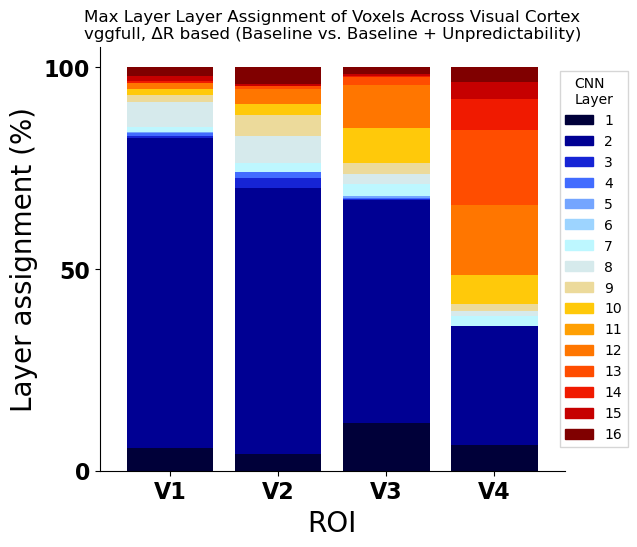

Working on subj02
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      59   7  61  V1   0.967160   0.994160   1.000000   0.993749   0.988626   
1      59   8  62  V1   0.979063   1.000000   0.999219   0.998692   0.975822   
2      59  10  59  V1   1.000000   0.977796   0.890836   0.903552   0.841364   
3      59  10  60  V1   0.708413   0.682737   0.809488   0.820783   0.897134   
4      59  12  59  V1   0.982501   1.000000   0.994534   0.981940   0.973818   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1563  104  35  54  V4   0.128575   0.000000   0.083830   0.081842   0.200509   
1564  105  25  55  V4   0.786053   0.616715   0.663896   0.647148   0.851424   
1565  105  26  54  V4   0.431546   0.324931   0.458336   0.434895   0.634157   
1566  105  27  53  V4   0.136923   0.000000   0.087042   0.090204   0.233736   
1567  105  28  53  V4   0.622514   1.000000   0.514265   0.541998   0.387345   

      delta_r_7  ... 

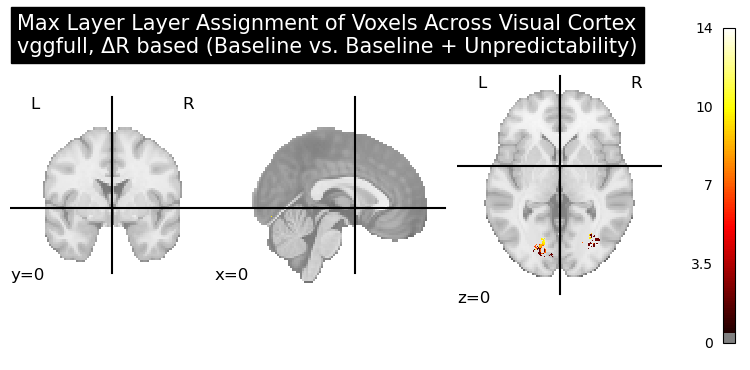

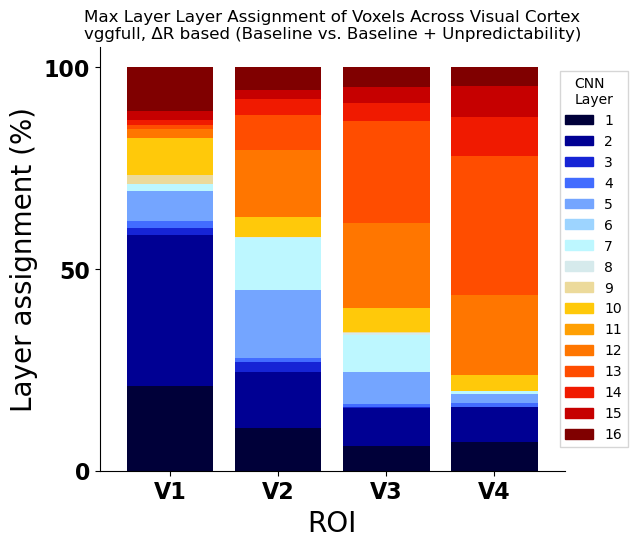

Working on subj03
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      58  20  40  V1   0.972047        1.0   0.977969   0.949384   0.945604   
1      59  17  42  V1   0.963467        1.0   0.934829   0.901357   0.874988   
2      59  20  39  V1   0.945424        1.0   0.940949   0.899229   0.880962   
3      60  15  46  V1   0.924757        1.0   0.865673   0.828961   0.760917   
4      60  17  41  V1   0.986619        1.0   0.974072   0.956588   0.934846   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1998  114  34  49  V4   0.090191        0.0   0.090202   0.064624   0.210641   
1999  115  31  55  V4   0.140284        0.0   0.055113   0.016992   0.172058   
2000  115  32  50  V4   0.151353        0.0   0.139265   0.097213   0.174305   
2001  115  32  55  V4   0.122951        0.0   0.062659   0.025234   0.147873   
2002  115  34  48  V4   0.068273        0.0   0.046508   0.028341   0.106230   

      delta_r_7  ... 

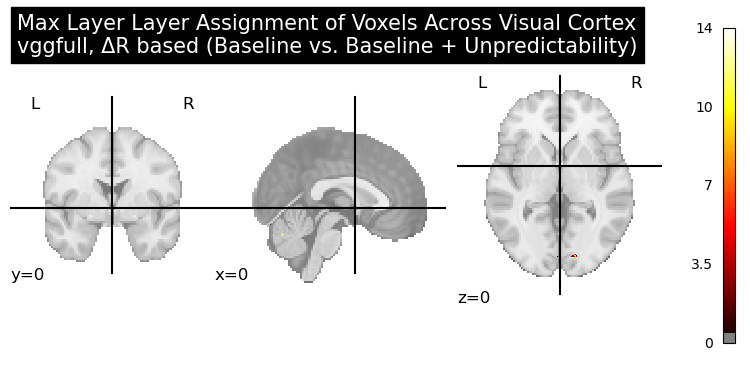

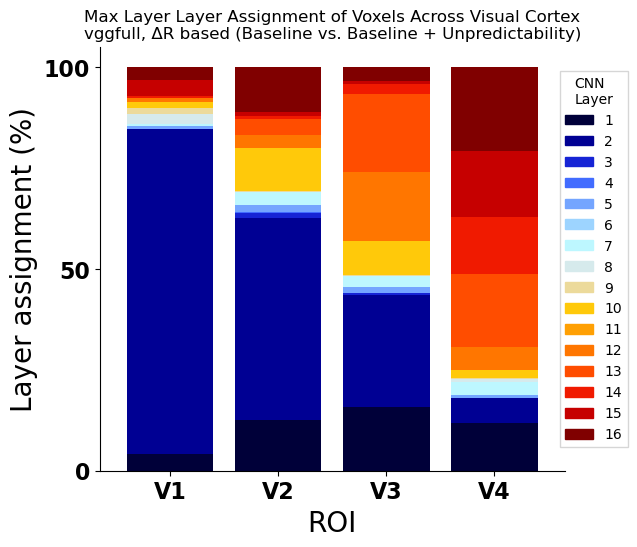

Working on subj04
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      57  15  50  V1   0.962321   0.982826   1.000000   0.994917   0.962681   
1      57  17  48  V1   0.983431   1.000000   0.972289   0.967230   0.948997   
2      58  14  49  V1   0.882013   0.852269   0.896578   0.831480   0.931306   
3      58  14  50  V1   1.000000   0.934306   0.962297   0.900563   0.878244   
4      58  15  49  V1   0.566062   0.561159   0.658381   0.643841   0.753959   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1144  109  24  53  V4   0.151775   0.000000   0.069617   0.055392   0.188107   
1145  109  24  54  V4   0.166237   0.000000   0.074248   0.056296   0.201281   
1146  109  24  55  V4   0.187336   0.000000   0.097985   0.082660   0.243973   
1147  109  25  53  V4   0.101018   0.000000   0.047630   0.037124   0.135223   
1148  109  25  56  V4   0.157591   0.000000   0.120578   0.109248   0.249913   

      delta_r_7  ... 

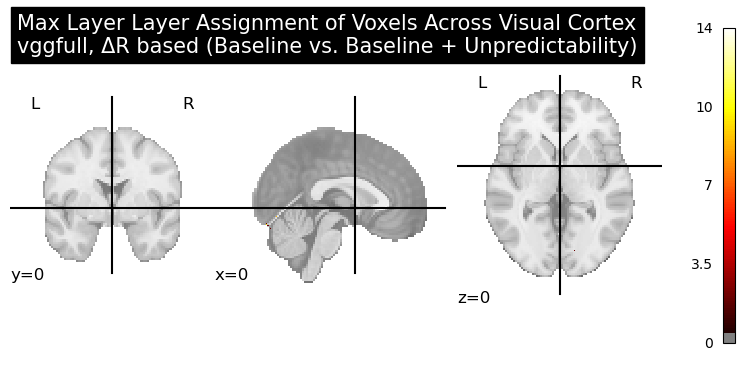

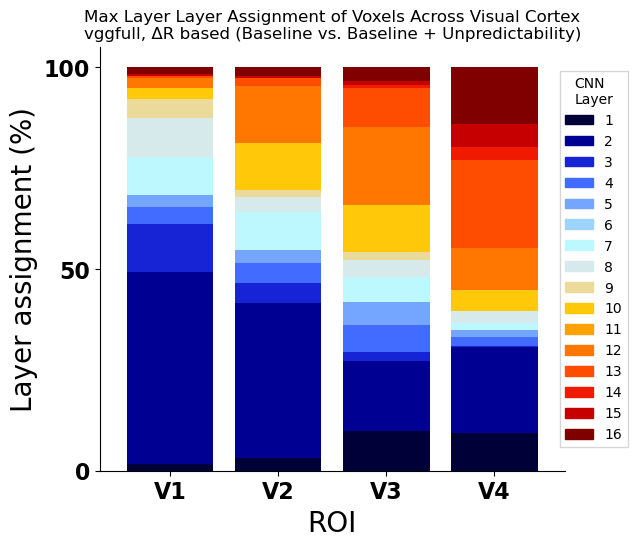

Working on subj05
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      46  13  50  V1   0.944294   1.000000   0.891805   0.864607   0.809122   
1      47  12  50  V1   0.614613   0.681614   0.463924   0.459176   0.313033   
2      47  14  52  V1   0.953013   1.000000   0.980650   0.992873   0.973190   
3      47  15  51  V1   0.978819   1.000000   0.916730   0.918630   0.861983   
4      48  11  50  V1   0.865077   1.000000   0.869963   0.827299   0.698297   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1968  109  26  46  V4   0.059004   0.000000   0.038335   0.026259   0.098387   
1969  109  26  47  V4   0.109449   0.000000   0.032400   0.016793   0.107998   
1970  109  27  46  V4   0.135085   0.000000   0.091272   0.058964   0.237842   
1971  109  30  44  V4   0.015993   0.003242   0.007110   0.000000   0.029168   
1972  110  27  46  V4   0.098101   0.000000   0.046144   0.029930   0.151948   

      delta_r_7  ... 

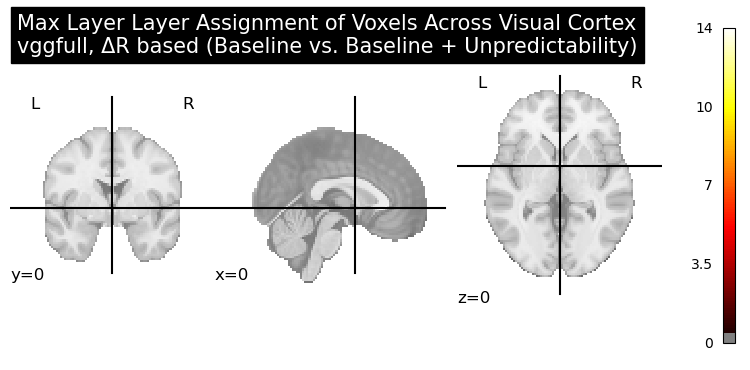

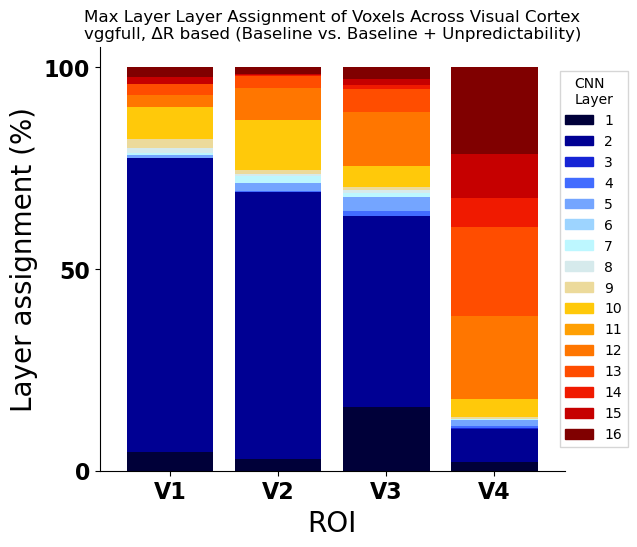

Working on subj06
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      62  25  75  V1   0.678198   0.671182   0.662200   0.610159   0.656610   
1      62  25  76  V1   0.627135   0.571133   0.592555   0.557454   0.633325   
2      64  13  86  V1   0.885997   1.000000   0.918871   0.917277   0.842848   
3      64  16  60  V1   0.970453   1.000000   0.966005   0.935841   0.933551   
4      64  20  85  V1   0.920286   1.000000   0.907829   0.895054   0.805790   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
2044  107  26  53  V4   0.152661   0.041967   0.048515   0.000000   0.109053   
2045  107  27  53  V4   0.148788   0.052954   0.042742   0.000000   0.080248   
2046  108  25  53  V4   0.303725   0.210988   0.097733   0.000000   0.097116   
2047  108  26  53  V4   0.249857   0.122504   0.068387   0.000000   0.096364   
2048  108  27  52  V4   0.150983   0.026881   0.035550   0.000000   0.103330   

      delta_r_7  ... 

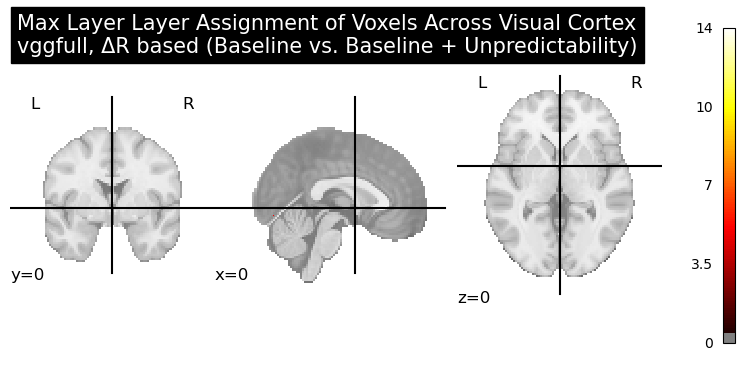

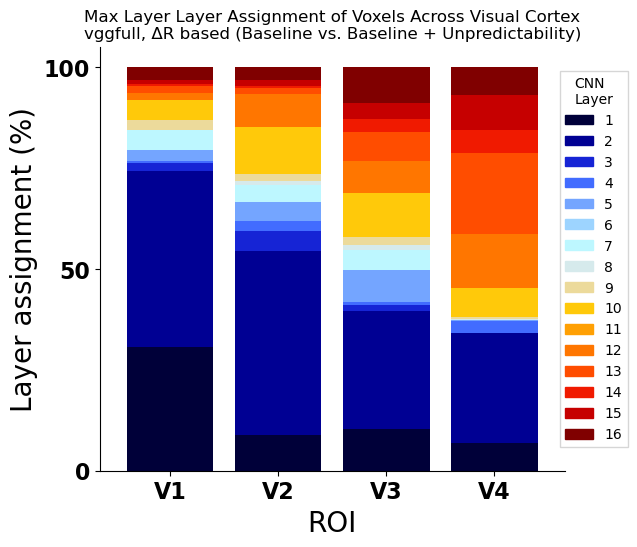

Working on subj07
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      42   9  72  V1   0.834906   0.860570   0.890878   0.880902   0.880478   
1      43   9  71  V1   0.971889   0.943519   0.953051   0.915096   0.955451   
2      43  10  70  V1   0.984220   0.998933   0.968009   0.937087   0.948805   
3      43  10  71  V1   0.984758   0.966764   0.958112   0.923568   0.950396   
4      43  10  72  V1   0.893000   0.850212   0.856160   0.817238   0.862526   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
2210  104  25  50  V4   0.062131   0.000000   0.027675   0.022471   0.088631   
2211  104  25  51  V4   0.127769   0.000000   0.054178   0.024231   0.187598   
2212  105  24  50  V4   0.109486   0.000000   0.030376   0.000238   0.114960   
2213  105  24  51  V4   0.203987   0.057714   0.066121   0.000000   0.173197   
2214  105  25  50  V4   0.085090   0.000000   0.034834   0.013046   0.109988   

      delta_r_7  ... 

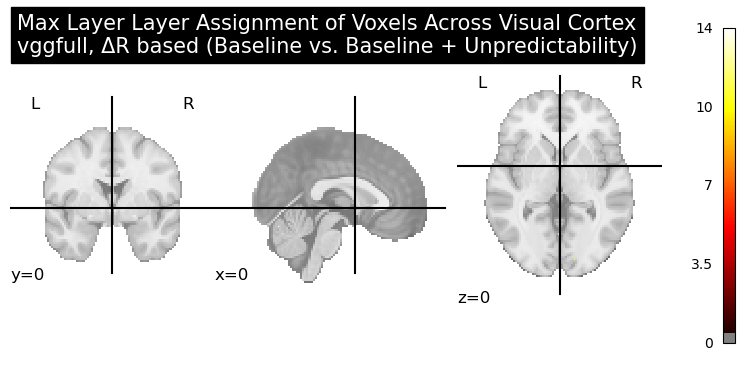

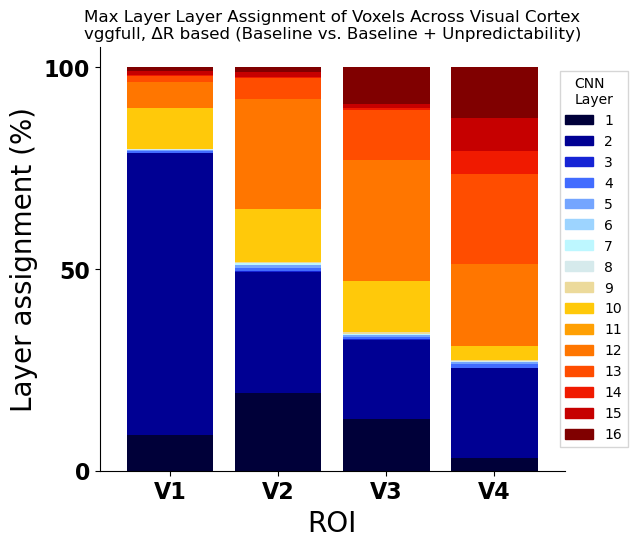

Working on subj08
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      47  19  43  V1   0.294342   0.157437   0.133951   0.125137   0.038515   
1      47  20  43  V1   0.164059   0.058488   0.099745   0.086848   0.000000   
2      47  22  42  V1   0.941668   1.000000   0.942759   0.934068   0.913340   
3      47  23  40  V1   0.907534   1.000000   0.816463   0.763508   0.740801   
4      48  20  41  V1   0.187383   0.144645   0.031984   0.000000   0.006782   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1280  102  24  39  V4   0.096496   0.014550   0.024551   0.000000   0.114799   
1281  102  25  39  V4   0.180129   0.117986   0.054118   0.000000   0.155483   
1282  103  20  44  V4   0.122253   0.164987   0.152053   0.184824   0.086486   
1283  103  23  41  V4   0.222537   0.213778   0.071796   0.000000   0.078989   
1284  103  24  41  V4   0.129465   0.102238   0.062488   0.000000   0.098499   

      delta_r_7  ... 

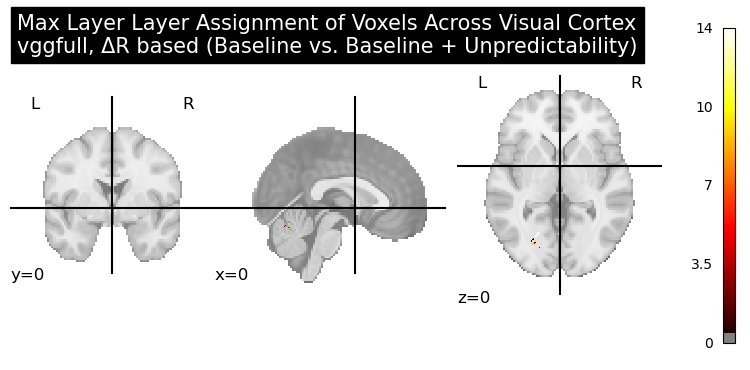

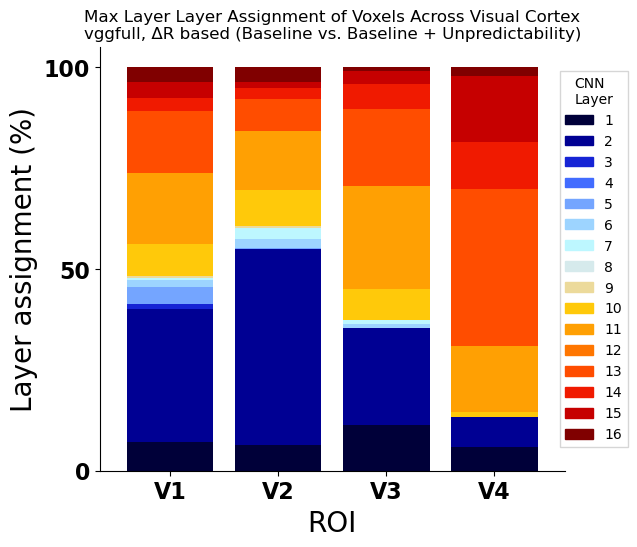

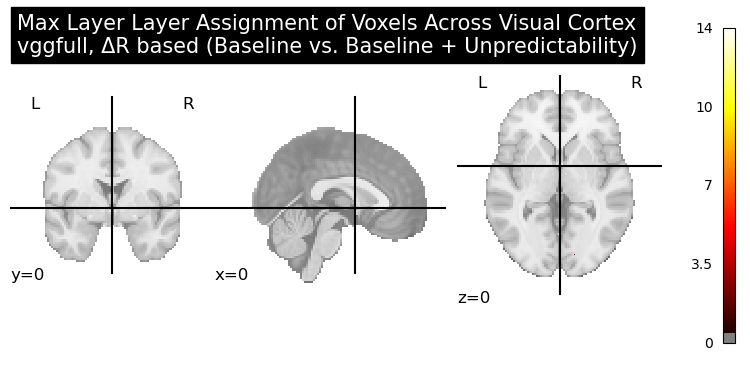

In [4]:
### LAYASSIGN STATS

for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vggfull",
                assign_stat="max",
                reg_stat="delta_r",
                plot_brain=True,
                plot_lay_assign=True,
                save_nifti=True,
                verbose=True,
                custom_subfolder="vggfull_gabor_baseline",
                )

In [5]:


for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="unpredvggfull_gabor_baseline_vggfull_layassign_max",
                interpmethod="wta",
                )

### Full VGG16 Encoding results 

Working on subj03
         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       57  23  38  V1   0.034141   0.077562   0.575535   1.000000   
1       57  23  39  V1   0.257697   0.301548   0.530366   1.000000   
2       57  24  38  V1   0.303872   0.357481   0.666647   1.000000   
3       57  24  39  V1   0.176477   0.287509   0.738527   0.741665   
4       57  25  39  V1   0.190973   0.056850   0.802032   0.665413   
...    ...  ..  ..  ..        ...        ...        ...        ...   
21876  116  33  48  V4   0.072829   0.336876   0.626678   0.925220   
21877  116  33  49  V4   0.033618   0.274883   0.299902   0.133830   
21878  116  33  50  V4   0.000000   0.053412   0.465896   0.467376   
21879  116  34  48  V4   0.000000   0.212346   0.580516   0.149953   
21880  117  33  50  V4   0.000000   0.244218   0.310800   0.606398   

       delta_r_11  delta_r_13  ...  delta_r_20  delta_r_22  delta_r_25  \
0        0.634049    0.825118  ...    0.796387    0.605937    0.906

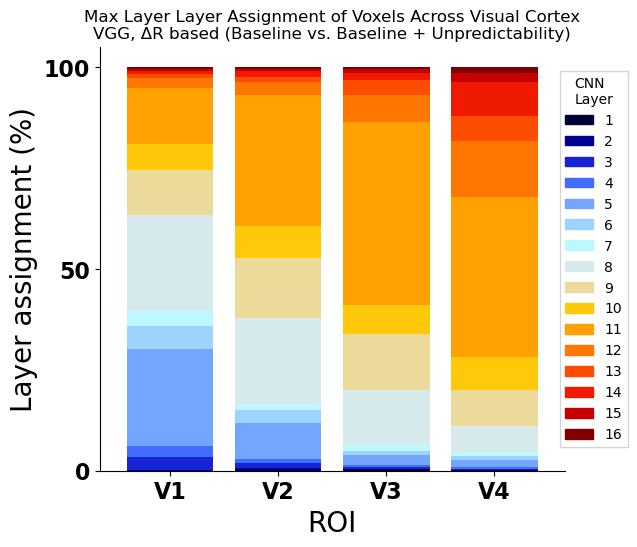

Working on subj04
         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       56  13  49  V1   0.098902   0.115515   0.374590   0.000000   
1       56  15  48  V1   0.000000   0.613621   0.724978   0.892775   
2       57  13  49  V1   0.025548   0.285382   0.354058   0.452702   
3       57  14  48  V1   0.305064   0.470375   0.687544   0.257499   
4       57  14  49  V1   0.119636   0.394206   0.654333   0.672257   
...    ...  ..  ..  ..        ...        ...        ...        ...   
17661  110  26  56  V4   0.581046   0.278223   0.276090   0.346268   
17662  110  27  53  V4   0.538903   0.556207   0.134606   0.110905   
17663  110  27  54  V4   0.177319   0.162947   0.283567   0.000000   
17664  110  33  47  V4   0.000000   0.186353   0.264289   0.301967   
17665  110  33  48  V4   0.000000   0.177858   0.356679   0.286099   

       delta_r_11  delta_r_13  ...  delta_r_20  delta_r_22  delta_r_25  \
0        0.053751    0.338669  ...    0.175162    0.820539    1.000

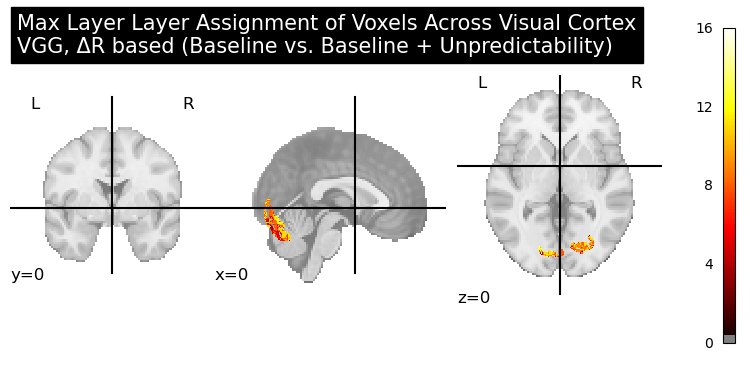

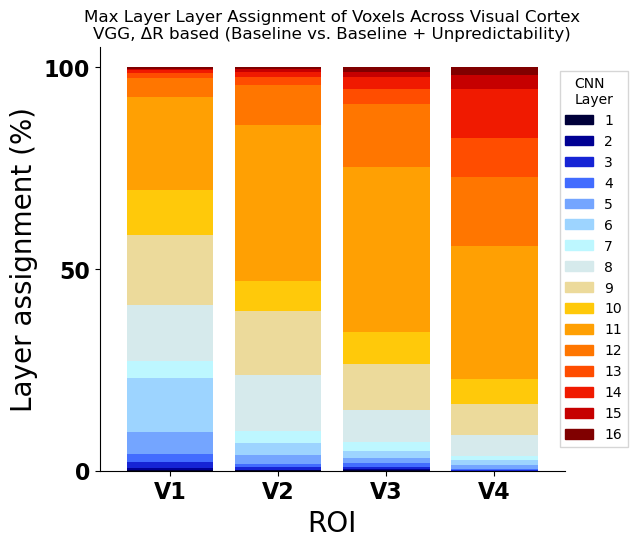

Working on subj05
         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       46  13  50  V1   0.020241   0.240197   0.000000   0.668988   
1       47  11  51  V1   0.000000   0.442770   0.769417   1.000000   
2       47  12  50  V1   0.000000   0.511863   0.581048   0.737378   
3       47  12  51  V1   0.024619   0.958002   0.445324   0.453476   
4       47  13  50  V1   0.355239   0.424604   0.000000   0.198663   
...    ...  ..  ..  ..        ...        ...        ...        ...   
21373  109  31  44  V4   0.494752   0.000000   0.150263   0.383634   
21374  109  31  45  V4   0.401363   0.250426   0.005485   0.398734   
21375  109  32  44  V4   0.342192   0.099472   0.000000   0.230174   
21376  110  27  45  V4   0.000000   0.034260   0.761725   0.306814   
21377  110  27  46  V4   0.043199   0.129045   0.116034   0.000000   

       delta_r_11  delta_r_13  ...  delta_r_20  delta_r_22  delta_r_25  \
0        0.607801    0.356482  ...    0.494579    0.690600    0.685

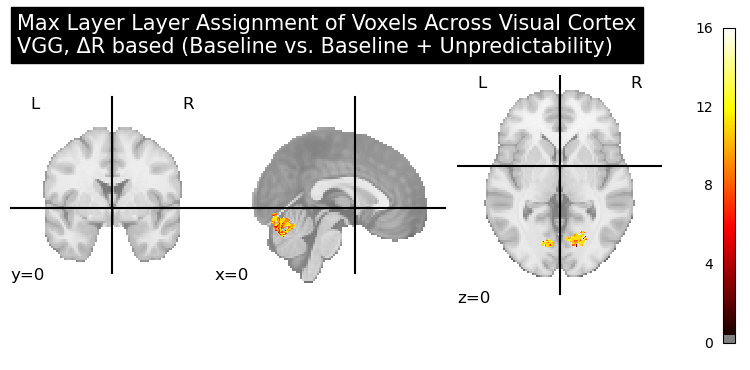

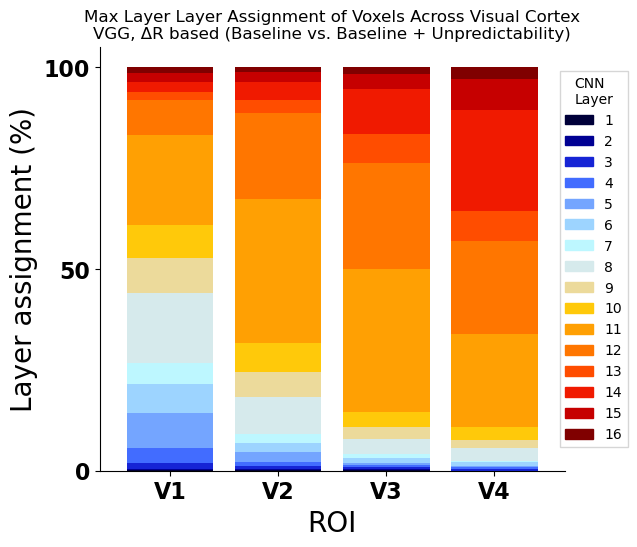

Working on subj06
         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       57  20  81  V1   0.202722   0.148877   0.040998   0.000000   
1       57  21  81  V1   0.000000   0.086600   0.243299   0.119456   
2       57  22  81  V1   0.000000   0.045617   0.429386   0.196445   
3       58  18  83  V1   0.000000   0.249602   0.421262   0.435426   
4       58  18  84  V1   0.000000   0.251125   0.431162   0.425035   
...    ...  ..  ..  ..        ...        ...        ...        ...   
23355  110  26  52  V4   0.000000   0.117364   0.233632   0.384666   
23356  110  27  49  V4   0.000000   0.204390   0.298769   0.495469   
23357  110  27  50  V4   0.000000   0.208911   0.287694   0.352873   
23358  110  27  51  V4   0.000000   0.143359   0.367139   0.350526   
23359  110  28  49  V4   0.000000   0.194842   0.332663   0.519064   

       delta_r_11  delta_r_13  ...  delta_r_20  delta_r_22  delta_r_25  \
0        0.398318    0.683488  ...    0.797531    0.447734    0.990

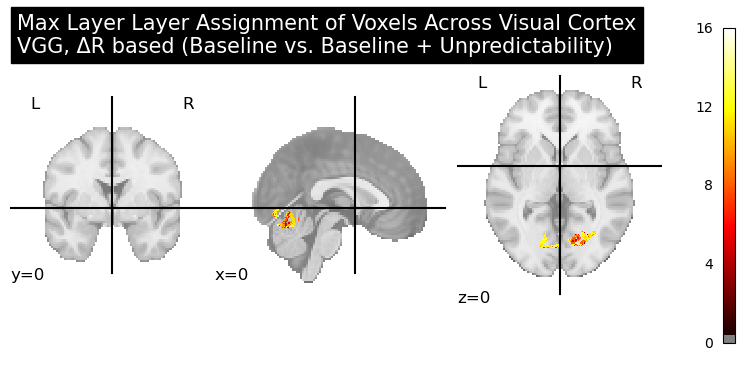

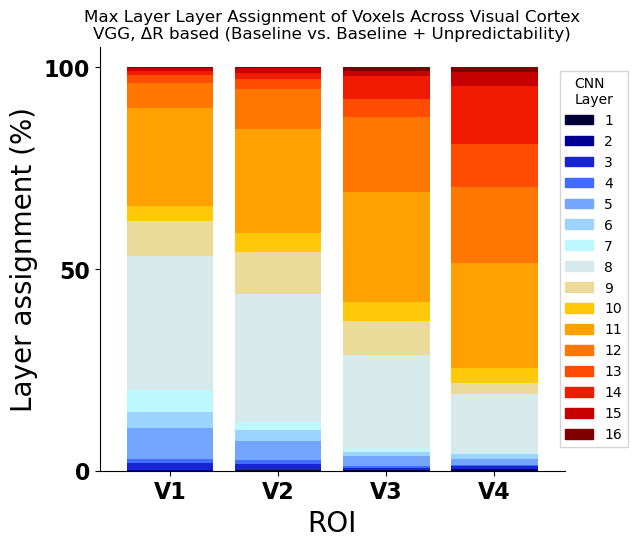

Working on subj07
         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       42   9  72  V1   0.108536   0.247199   0.220388   0.488120   
1       43   9  69  V1   0.000000   0.308582   0.554304   0.864008   
2       43   9  71  V1   0.000000   0.287589   0.595305   0.607002   
3       43   9  72  V1   0.019307   0.501824   0.628390   0.607229   
4       43   9  73  V1   0.065215   0.224396   0.484485   0.499694   
...    ...  ..  ..  ..        ...        ...        ...        ...   
18746  105  25  49  V4   0.000000   0.007566   0.315290   0.180687   
18747  105  25  50  V4   0.000000   0.164076   0.271646   0.284019   
18748  105  26  48  V4   0.013011   0.000000   0.195064   0.140742   
18749  106  24  50  V4   0.000000   0.048497   0.190817   0.267408   
18750  106  25  48  V4   0.035498   0.000000   0.115901   0.249856   

       delta_r_11  delta_r_13  ...  delta_r_20  delta_r_22  delta_r_25  \
0        0.692204    0.660763  ...    0.860231    1.000000    0.503

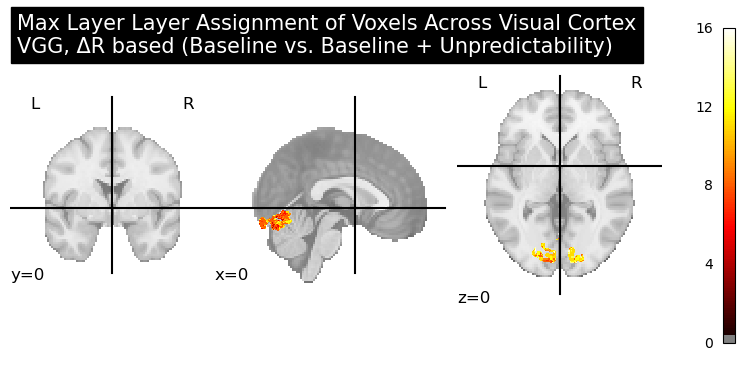

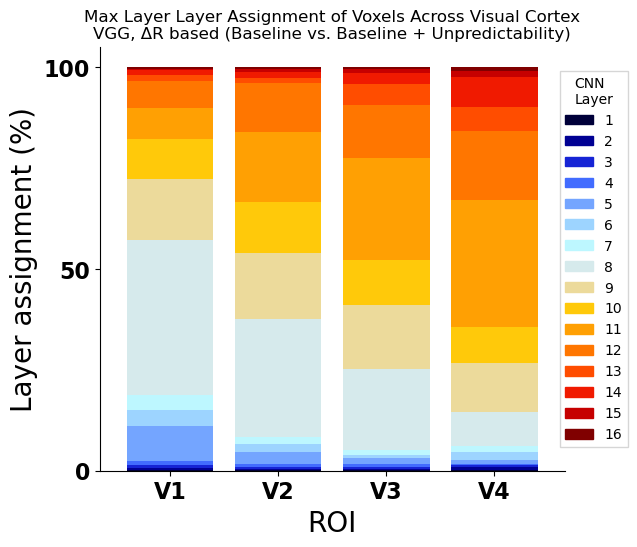

Working on subj08
         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       46  20  40  V1   0.310823   0.730877   0.719439   0.893500   
1       46  20  41  V1   0.321930   0.484859   0.535828   0.855027   
2       46  20  42  V1   0.000000   0.340752   0.587619   0.754127   
3       46  21  39  V1   0.000000   0.544343   0.710983   0.623301   
4       46  21  40  V1   0.000000   0.661104   0.747095   0.810605   
...    ...  ..  ..  ..        ...        ...        ...        ...   
20190  104  18  45  V4   0.000000   0.138556   0.779988   0.729731   
20191  104  18  46  V4   0.000000   0.034900   0.234050   0.353194   
20192  104  19  44  V4   0.316292   0.370137   0.060438   0.206566   
20193  104  19  45  V4   1.000000   0.818469   0.339485   0.714758   
20194  104  20  43  V4   0.000000   0.879784   0.713834   0.378973   

       delta_r_11  delta_r_13  ...  delta_r_20  delta_r_22  delta_r_25  \
0        0.714533    0.955730  ...    0.706162    0.810347    0.884

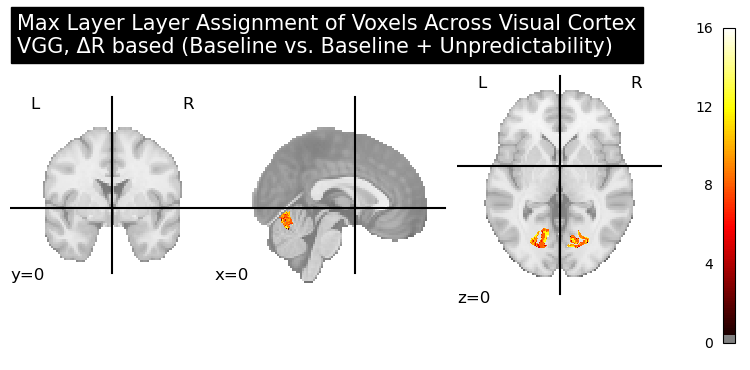

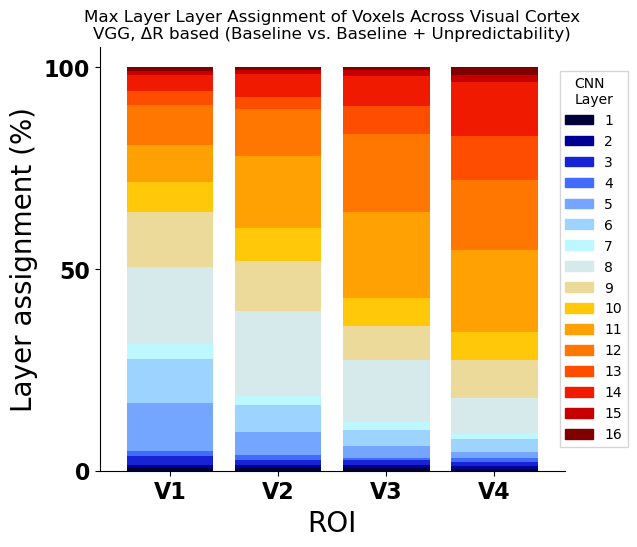

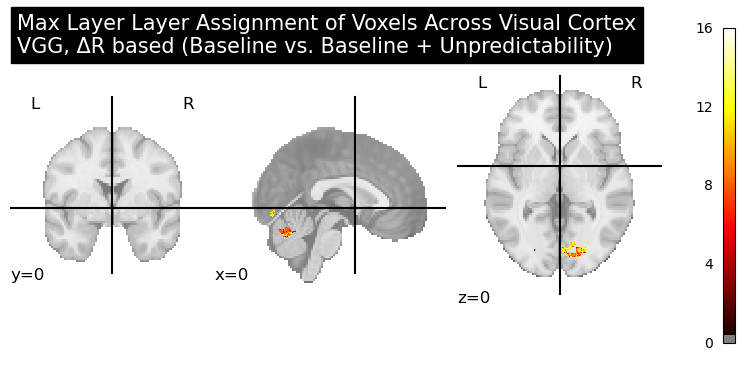

In [4]:


for subject in NSP.subjects[2:]:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="encoding",
                model="VGG",
                assign_stat="max",
                reg_stat="delta_r",
                plot_brain=True,
                plot_lay_assign=True,
                save_nifti=True,
                verbose=True,
                )

In [12]:
# /home/rfpred/data/custom_files/subj08/stat_volumes/encoding_VGG_layassign_max.nii
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="encoding_VGG_layassign_max",
                interpmethod="wta",
                )

### Mean unpred Xpred results

Working on subj01
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     63  17  55  V1   0.918030   1.000000   0.880237   0.841944   0.787388   
1     67   6  66  V1   0.950918   1.000000   0.899903   0.840016   0.829303   
2     67   8  65  V1   0.974702   1.000000   0.930222   0.874550   0.866823   
3     67   9  64  V1   0.983873   1.000000   0.976467   0.937845   0.933536   
4     67   9  66  V1   0.947749   1.000000   0.949871   0.871526   0.884882   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
188   96  33  72  V4   0.343098   0.210142   0.210454   0.225441   0.299366   
189   96  34  72  V4   0.425165   0.319030   0.283949   0.295490   0.366283   
190  112  28  63  V4   0.162796   0.130160   0.248640   0.288548   0.428800   
191  112  31  63  V4   0.683660   0.667832   0.645375   0.598362   0.658772   
192  113  28  63  V4   0.105408   0.000000   0.107370   0.105322   0.323117   

     delta_r_7  ...  delta_r_10  

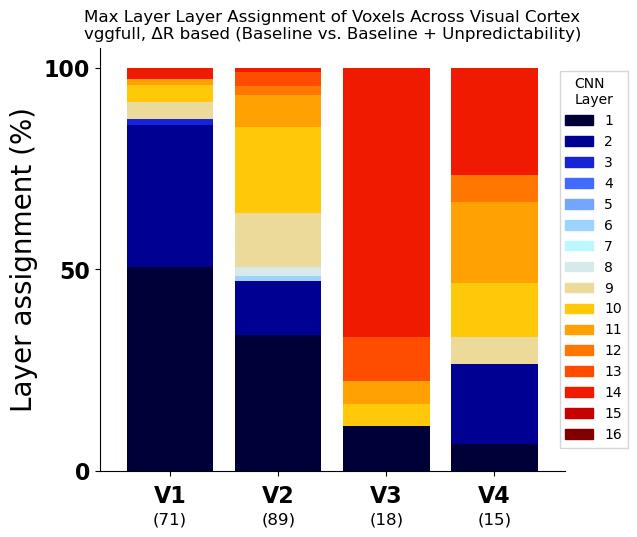

Working on subj01
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     82  22  77  V1   0.949238   0.981905   0.924054   0.848988   0.876947   
1     83  22  77  V1   0.920560   1.000000   0.923089   0.861894   0.828230   
2     88  19  77  V1   0.941085   1.000000   0.944908   0.910253   0.858461   
3     88  20  78  V1   0.949521   1.000000   0.962087   0.940819   0.894318   
4     88  20  79  V1   0.953647   1.000000   0.975000   0.946606   0.902370   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
264  109  31  66  V4   0.074952   0.000000   0.062013   0.066281   0.208061   
265  109  32  66  V4   0.031854   0.000000   0.021765   0.018258   0.099123   
266  109  32  67  V4   0.059252   0.000000   0.044265   0.043956   0.141492   
267  110  31  65  V4   0.098626   0.000000   0.050164   0.031465   0.169955   
268  110  31  66  V4   0.072937   0.000000   0.042204   0.038080   0.146377   

     delta_r_7  ...  delta_r_10  

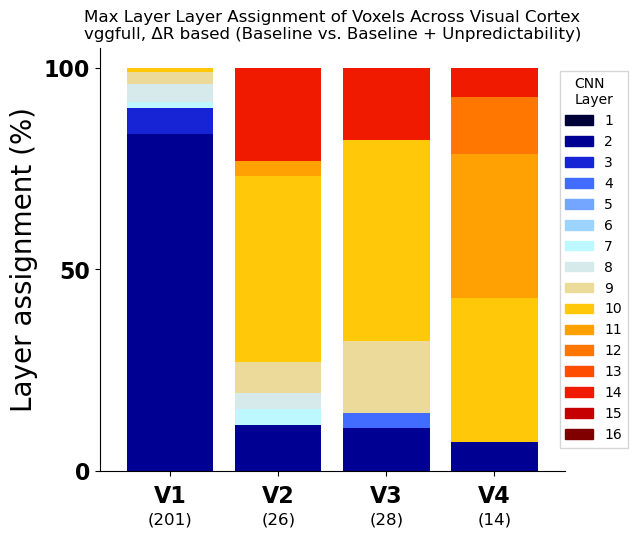

Working on subj01
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     58  14  60  V1   0.921191   1.000000   0.883533   0.834949   0.764493   
1     60   6  70  V1   0.913227   1.000000   0.856035   0.798387   0.721250   
2     60   6  75  V1   0.887252   1.000000   0.895132   0.837751   0.791787   
3     60   8  74  V1   0.919866   1.000000   0.883640   0.839676   0.784906   
4     61   6  75  V1   0.902968   1.000000   0.878761   0.821320   0.760930   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
193   46  24  60  V4   0.839509   0.930692   0.959874   0.932661   0.925029   
194   49  25  60  V4   0.130555   0.000000   0.035668   0.048311   0.194975   
195   49  26  60  V4   0.069978   0.028883   0.002634   0.000000   0.104943   
196   96  22  60  V4   0.992297   1.000000   0.952596   0.926115   0.849051   
197  106  21  62  V4   0.610196   0.620842   0.458029   0.323596   0.434204   

     delta_r_7  ...  delta_r_10  

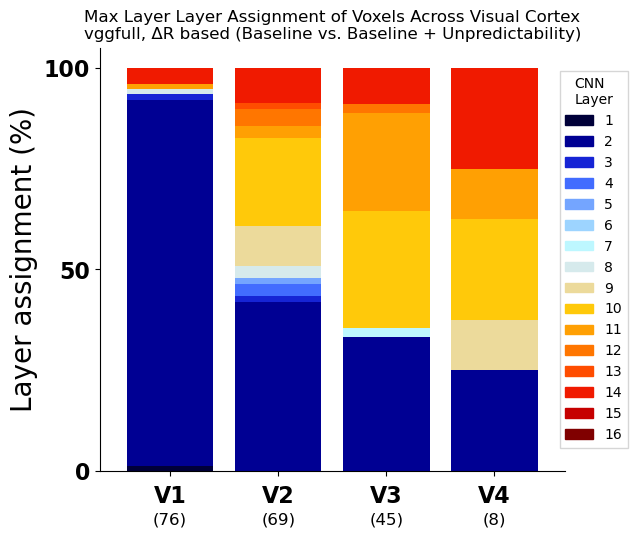

Working on subj02
      x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0    69  17  51  V1   0.678344   0.691836   0.443276   0.297499   0.468467   
1    69  18  50  V1   0.533085   0.606141   0.412562   0.299756   0.475113   
2    69  18  51  V1   0.558645   0.480759   0.327205   0.237187   0.443356   
3    69  19  50  V1   0.181194   0.135035   0.064795   0.033166   0.072582   
4    69  19  51  V1   0.211659   0.136742   0.081150   0.068305   0.097369   
..   ..  ..  ..  ..        ...        ...        ...        ...        ...   
240  91  35  62  V4   0.972891   0.930123   0.612306   0.471320   0.669494   
241  92  34  63  V4   1.000000   0.951790   0.684627   0.557641   0.772842   
242  92  35  62  V4   0.293427   0.243296   0.089427   0.000000   0.209813   
243  93  34  63  V4   0.081450   0.000000   0.120389   0.129088   0.166816   
244  94  35  62  V4   0.894088   1.000000   0.790432   0.716442   0.739647   

     delta_r_7  ...  delta_r_10  delta_r_11  

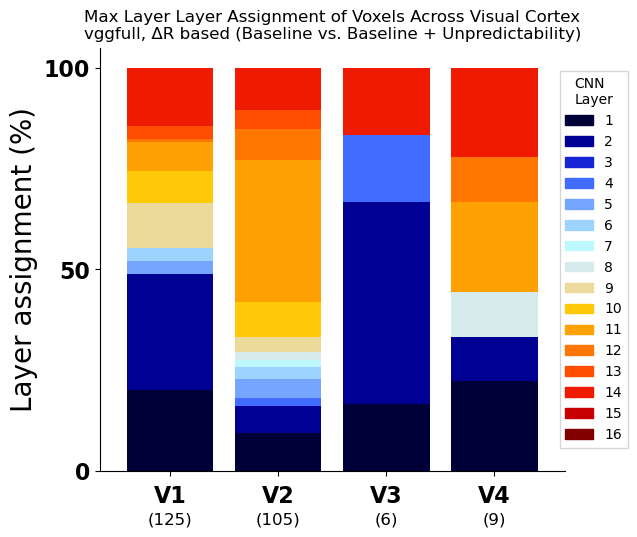

Working on subj02
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     79  14  83  V1   0.097188   0.016407   0.004767   0.000000   0.051323   
1     79  30  51  V1   0.793404   0.648763   0.439494   0.441584   0.402861   
2     82  14  70  V1   0.902860   1.000000   0.921234   0.861387   0.820468   
3     83  10  75  V1   0.926764   1.000000   0.707130   0.560310   0.534120   
4     83  12  74  V1   0.934076   1.000000   0.915717   0.849088   0.835765   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
526  102  18  72  V3   0.239961   0.139846   0.080582   0.000000   0.176442   
527  102  18  74  V3   0.267705   0.236115   0.144939   0.130752   0.127775   
528  103  16  72  V3   0.140644   0.000000   0.325381   0.366804   0.437051   
529  103  18  74  V3   0.129578   0.123816   0.039917   0.003099   0.000000   
530  102  28  53  V4   0.714104   0.837951   0.592734   0.505318   0.169643   

     delta_r_7  ...  delta_r_10  

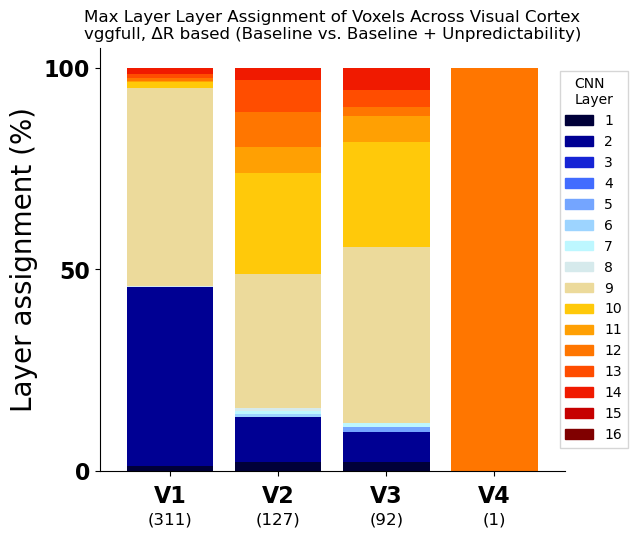

Working on subj02
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     61   8  64  V1   0.874072   1.000000   0.880808   0.849136   0.746034   
1     61  14  72  V1   0.910817   1.000000   0.967228   0.934742   0.923472   
2     62  12  74  V1   0.909736   1.000000   0.961419   0.926663   0.904236   
3     62  12  75  V1   0.912202   1.000000   0.957607   0.922157   0.903963   
4     62  13  72  V1   0.906588   0.990371   0.973078   0.939023   0.936946   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
624   49  38  55  V4   0.738049   0.688770   0.611627   0.604808   0.449273   
625   93  37  51  V4   0.811032   0.982108   0.630876   0.533983   0.610025   
626  103  30  51  V4   0.898829   0.885682   0.411365   0.269260   0.106143   
627  103  30  52  V4   0.363196   0.370300   0.587908   0.612149   0.624632   
628  104  27  53  V4   0.291760   0.136875   0.048112   0.000000   0.188625   

     delta_r_7  ...  delta_r_10  

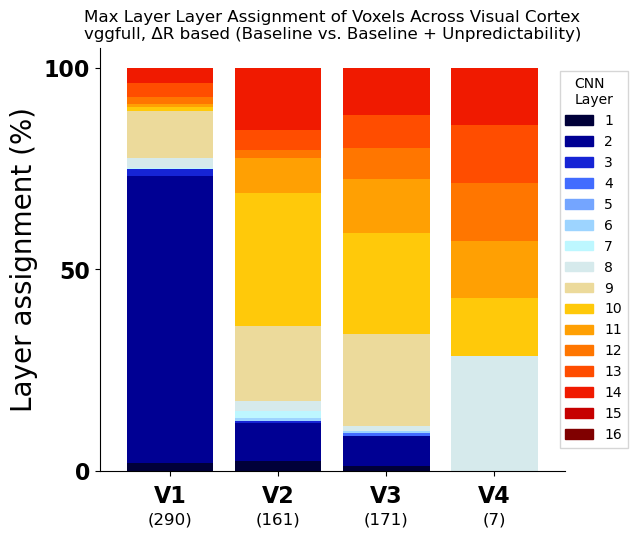

Working on subj03
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     65  15  45  V1   0.947240   1.000000   0.924202   0.874953   0.847739   
1     65  15  46  V1   0.816206   0.880056   0.748633   0.638479   0.781118   
2     65  28  39  V1   0.120648   0.086362   0.169465   0.098618   0.353684   
3     66  28  39  V1   0.730427   1.000000   0.742541   0.742619   0.545346   
4     66  29  39  V1   0.588858   0.630918   0.630359   0.531236   0.687647   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
485  104  36  51  V4   0.980129   0.963306   0.902944   0.853919   0.932398   
486  104  36  52  V4   0.665414   0.640367   0.587273   0.521768   0.650593   
487  104  36  53  V4   1.000000   0.993654   0.840453   0.747812   0.818636   
488  105  35  52  V4   0.585674   0.510456   0.522788   0.453373   0.618602   
489  113  31  48  V4   0.968298   1.000000   0.690552   0.596572   0.509464   

     delta_r_7  ...  delta_r_10  

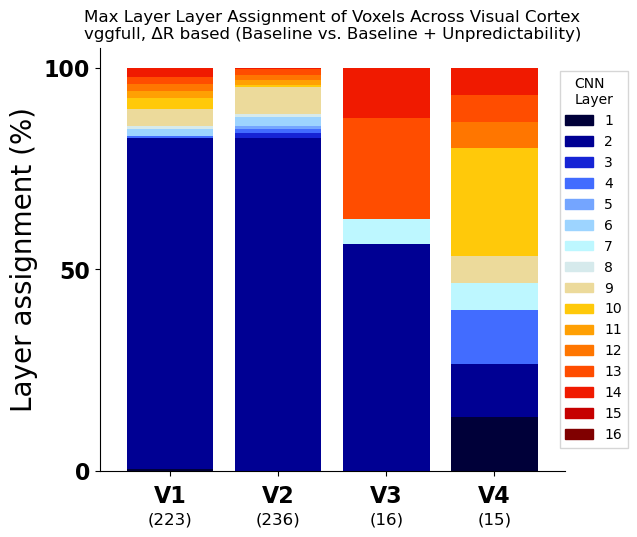

Working on subj03
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     67  18  56  V1   0.402958   0.250108   0.097916   0.000000   0.110216   
1     87  23  56  V1   0.143613   0.079718   0.047598   0.000000   0.070947   
2     87  24  57  V1   0.948962   1.000000   0.547238   0.392954   0.244788   
3     87  25  57  V1   0.921853   1.000000   0.507751   0.279500   0.162460   
4     88  12  73  V1   0.907189   1.000000   0.899118   0.880195   0.810359   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
496  106  22  73  V3   0.752987   0.677639   0.698837   0.617042   0.671892   
497  106  22  74  V3   0.298319   0.130019   0.094930   0.000000   0.106465   
498  104  41  50  V4   0.852902   1.000000   0.904133   0.861523   0.815811   
499  111  33  49  V4   0.723372   0.863468   0.533790   0.421114   0.345791   
500  113  32  46  V4   0.806198   0.972982   1.000000   0.994391   0.939508   

     delta_r_7  ...  delta_r_10  

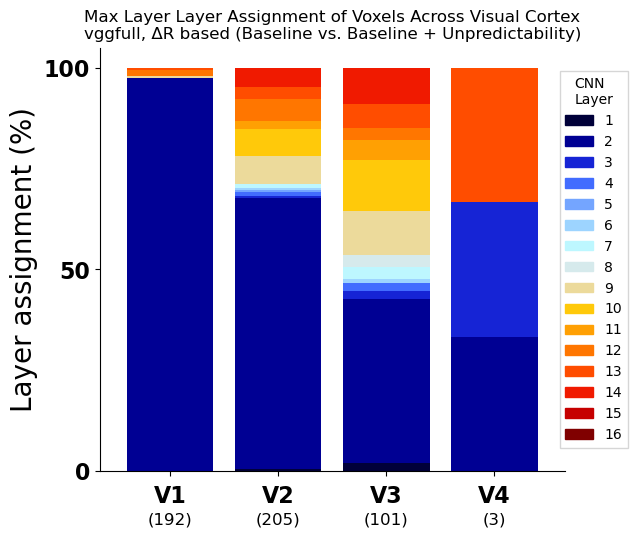

Working on subj03
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     58  26  38  V1   0.917193   1.000000   0.976766   0.922160   0.939819   
1     61  28  38  V1   0.912287   1.000000   0.850442   0.812218   0.707137   
2     66  15  47  V1   0.861669   1.000000   0.745605   0.666546   0.596497   
3     67  14  48  V1   0.888487   1.000000   0.781837   0.714287   0.609654   
4     67  15  48  V1   0.858224   1.000000   0.742996   0.662352   0.557371   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
519   48  35  40  V4   0.397539   0.509681   0.242780   0.147368   0.044047   
520   50  32  41  V4   0.326865   0.357863   0.369171   0.330713   0.452281   
521   51  35  40  V4   0.352993   0.243397   0.504744   0.716354   0.597572   
522   52  28  40  V4   0.079401   0.067927   0.035195   0.026213   0.019598   
523  110  32  46  V4   0.933241   1.000000   0.798390   0.685300   0.577523   

     delta_r_7  ...  delta_r_10  

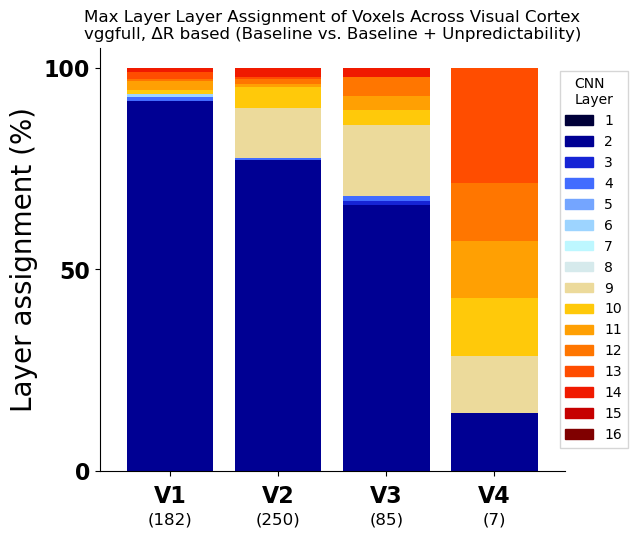

Working on subj04
      x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0    73  18  44  V1   0.008674   0.085283   0.269949   0.258270   0.337967   
1    75  19  52  V1   0.888150   1.000000   0.870022   0.859173   0.887640   
2    76  18  53  V1   0.624898   0.552971   0.441550   0.307498   0.455051   
3    76  18  54  V1   0.538021   0.509980   0.401974   0.275791   0.401694   
4    76  19  51  V1   0.037522   0.000000   0.088662   0.075501   0.187370   
..   ..  ..  ..  ..        ...        ...        ...        ...        ...   
431  59  29  44  V4   0.027251   0.103575   0.186118   0.191090   0.153001   
432  63  27  43  V4   0.342146   0.261617   0.431541   0.530083   0.476419   
433  66  30  51  V4   0.080849   0.378185   0.601514   0.707278   0.531385   
434  66  31  51  V4   0.105063   0.002543   0.034415   0.000000   0.124712   
435  96  36  53  V4   0.196085   0.215690   0.534718   0.608306   0.719915   

     delta_r_7  ...  delta_r_10  delta_r_11  

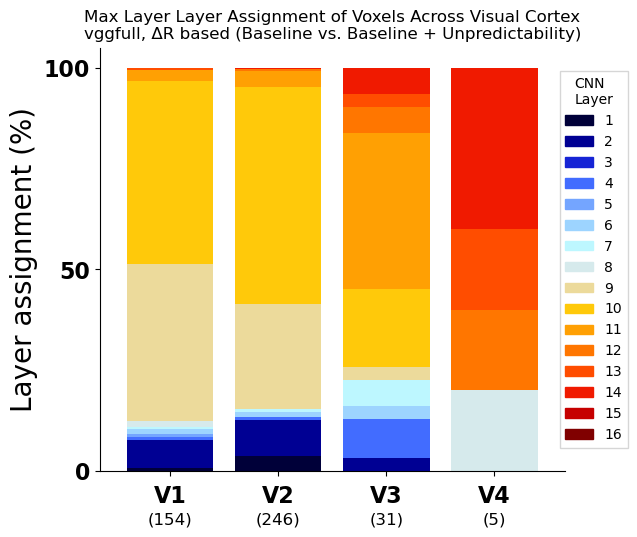

Working on subj04
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     87  17  59  V1   0.773215   0.789330   0.786600   0.744884   0.797999   
1     88  17  57  V1   0.810093   0.837137   0.839844   0.803160   0.831462   
2     88  17  58  V1   0.791052   0.826905   0.812800   0.776709   0.813514   
3     88  17  59  V1   0.770747   0.802252   0.791032   0.751746   0.799219   
4     88  18  58  V1   0.794784   0.839282   0.817707   0.782133   0.814175   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
296  100  14  66  V3   0.084685   0.000000   0.151838   0.122512   0.259040   
297  100  14  67  V3   0.070518   0.000000   0.067184   0.017233   0.120833   
298  100  15  70  V3   0.266740   0.294344   0.171980   0.056591   0.123029   
299  104  29  53  V4   0.325753   0.236598   0.328470   0.386192   0.345760   
300  110  25  51  V4   0.808218   0.973856   0.994288   1.000000   0.894746   

     delta_r_7  ...  delta_r_10  

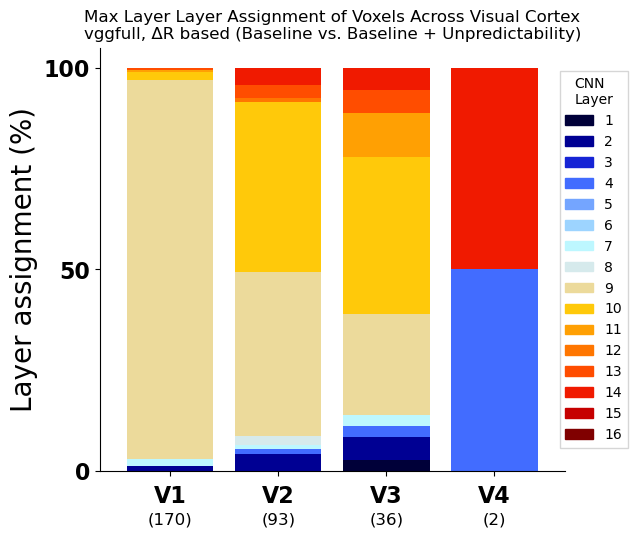

Working on subj04
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     59  14  48  V1   0.505775   0.588219   0.685509   0.652391   0.759809   
1     59  14  51  V1   0.714818   0.806409   0.869298   0.872080   0.872063   
2     59  15  47  V1   0.139847   0.176472   0.063878   0.066806   0.002474   
3     61  13  49  V1   0.728630   0.851064   0.817936   0.756766   0.774073   
4     61  14  47  V1   0.904795   1.000000   0.880247   0.789500   0.676581   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
270   60  36  48  V4   0.818239   0.716701   0.525264   0.532369   0.433228   
271   62  37  50  V4   0.291092   0.250559   0.181238   0.167076   0.169870   
272   66  29  49  V4   0.754561   0.812603   0.928061   1.000000   0.944780   
273  102  32  57  V4   0.921023   0.988285   0.956240   1.000000   0.791660   
274  110  26  55  V4   0.916300   1.000000   0.953018   0.974534   0.918306   

     delta_r_7  ...  delta_r_10  

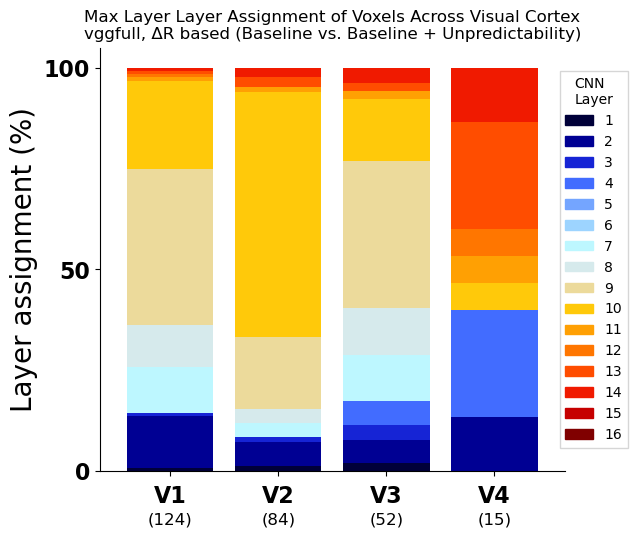

Working on subj05
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     67  21  48  V1   0.104115   0.000000   0.089863   0.033609   0.204419   
1     67  21  49  V1   0.395474   0.330041   0.293681   0.176928   0.371610   
2     68  21  51  V1   1.000000   0.986506   0.918218   0.856262   0.893375   
3     69  20  52  V1   0.951915   1.000000   0.946293   0.905356   0.894399   
4     71  23  53  V1   0.953860   1.000000   0.931009   0.864781   0.887698   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
166   34  26  53  V4   0.083214   0.148279   0.092751   0.091431   0.044092   
167   52  27  49  V4   0.892015   1.000000   0.861457   0.892634   0.708966   
168   99  28  49  V4   0.880375   1.000000   0.905992   0.909309   0.791134   
169   99  28  50  V4   0.893545   1.000000   0.900963   0.892131   0.801486   
170  102  21  48  V4   0.872815   0.532767   0.626036   0.622572   1.000000   

     delta_r_7  ...  delta_r_10  

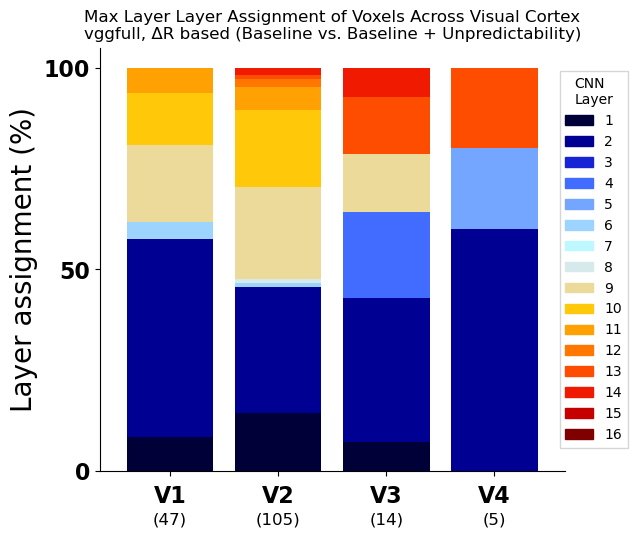

Working on subj05
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     79  22  65  V1   1.000000   0.955116   0.910024   0.831265   0.835240   
1     81  13  63  V1   0.974943   1.000000   0.927374   0.883669   0.901620   
2     82  13  60  V1   0.952653   1.000000   0.943604   0.914689   0.881984   
3     82  14  62  V1   0.943328   1.000000   0.927786   0.899155   0.869211   
4     83  14  63  V1   0.951021   1.000000   0.964327   0.936297   0.908295   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
345  106  21  62  V3   0.096092   0.000000   0.089577   0.045995   0.216808   
346   96  29  46  V4   0.308397   0.298394   0.445820   0.514609   0.528198   
347   97  28  46  V4   0.861972   0.916436   0.806627   0.798963   0.766553   
348   97  29  46  V4   0.924393   1.000000   0.830866   0.811754   0.749276   
349   97  29  47  V4   0.345604   0.347519   0.394290   0.393013   0.445517   

     delta_r_7  ...  delta_r_10  

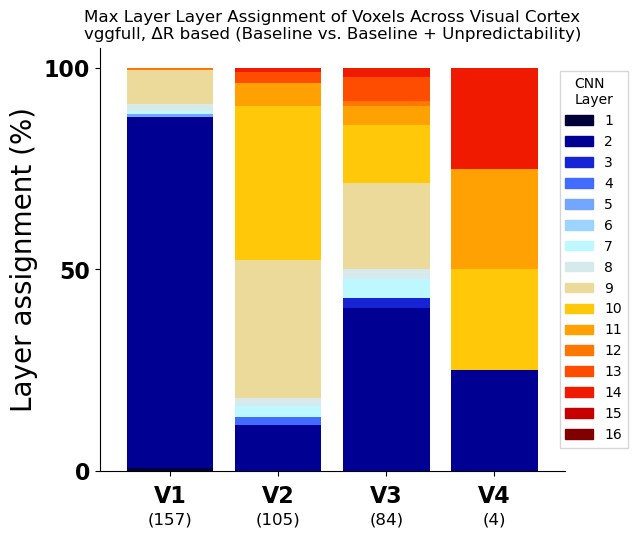

Working on subj05
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     49   9  53  V1   0.951772   1.000000   0.929442   0.900083   0.632018   
1     50   9  53  V1   0.857843   1.000000   0.813663   0.764146   0.583224   
2     51  11  49  V1   0.915891   1.000000   0.849377   0.793174   0.747170   
3     52  13  51  V1   0.565626   0.610558   0.689852   0.807256   0.895570   
4     52  16  48  V1   0.912186   1.000000   0.929875   0.899410   0.838301   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
480   37  30  54  V4   0.031993   0.000000   0.043246   0.033938   0.127066   
481   38  28  48  V4   0.886098   1.000000   0.842804   0.870943   0.644778   
482   38  29  48  V4   0.000000   0.003545   0.034099   0.043263   0.047306   
483   39  26  49  V4   0.803142   1.000000   0.808836   0.850068   0.583007   
484  102  38  45  V4   0.225272   0.221094   0.087082   0.018626   0.135279   

     delta_r_7  ...  delta_r_10  

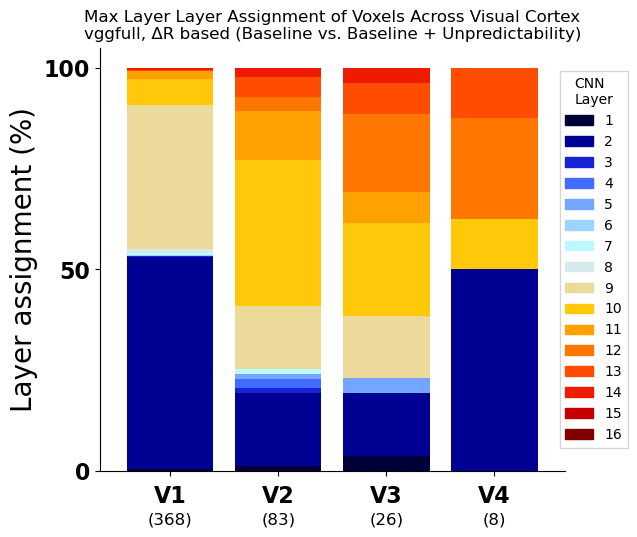

Working on subj06
      x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0    71  29  65  V1   0.648463   0.634044   0.531427   0.515740   0.463392   
1    71  29  66  V1   0.009580   0.000000   0.031103   0.069852   0.089001   
2    71  31  72  V1   0.123148   0.099265   0.081269   0.078849   0.104731   
3    74  22  58  V1   0.924152   1.000000   0.866984   0.820843   0.764533   
4    74  23  56  V1   0.958727   0.854387   0.883860   0.842166   0.969500   
..   ..  ..  ..  ..        ...        ...        ...        ...        ...   
120  92  31  47  V4   0.072799   0.065279   0.078841   0.062397   0.191606   
121  92  33  46  V4   0.222941   0.224693   0.125840   0.106250   0.027536   
122  93  26  46  V4   0.000000   0.022931   0.042251   0.070859   0.086936   
123  93  26  47  V4   0.162148   0.000000   0.059854   0.035502   0.230493   
124  94  28  46  V4   0.254767   0.237741   0.144478   0.156881   0.107317   

     delta_r_7  ...  delta_r_10  delta_r_11  

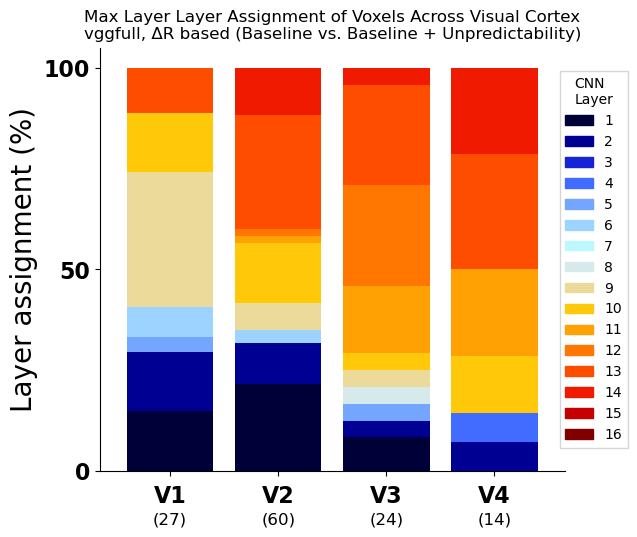

Working on subj06
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     78  13  54  V1   0.769510   0.749736   0.755410   0.726474   0.814586   
1     78  14  52  V1   0.840414   0.864302   0.846043   0.797693   0.825455   
2     78  15  51  V1   0.964341   0.995340   0.964854   0.915999   0.917111   
3     78  20  57  V1   0.784605   0.815440   0.862082   0.859444   0.884011   
4     78  21  56  V1   0.679574   0.725159   0.698716   0.687987   0.745553   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
369  102  28  46  V4   0.412753   0.372755   0.370153   0.377547   0.345153   
370  103  24  47  V4   0.000000   0.006269   0.100237   0.143921   0.264680   
371  103  25  48  V4   0.030786   0.023071   0.020536   0.042148   0.069261   
372  104  24  46  V4   0.504912   0.580302   0.564804   0.527058   0.581803   
373  107  28  49  V4   0.354920   0.351362   0.306928   0.368702   0.300381   

     delta_r_7  ...  delta_r_10  

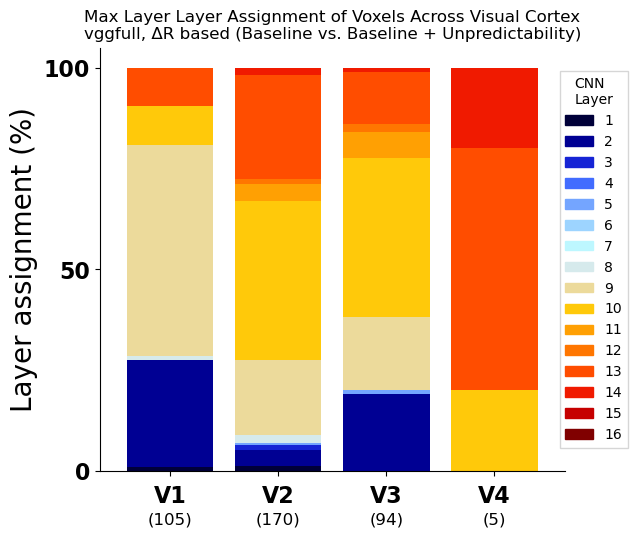

Working on subj06
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     61  18  81  V1   0.844640   0.734492   0.843536   0.991207   0.946112   
1     62  16  83  V1   0.275567   0.350423   0.321359   0.352901   0.310724   
2     63  18  62  V1   0.889873   1.000000   0.941174   0.901511   0.878808   
3     64  17  64  V1   0.343681   0.405357   0.395019   0.409987   0.388356   
4     64  19  65  V1   0.925545   1.000000   0.979293   0.956310   0.924501   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
318   55  24  49  V4   0.914866   0.959352   0.963287   0.948567   0.927105   
319   56  21  47  V4   0.862018   0.901426   0.947102   1.000000   0.878386   
320   56  23  57  V4   0.009468   0.000000   0.011424   0.019419   0.110022   
321   94  20  51  V4   0.021314   0.000000   0.071511   0.116775   0.158991   
322  100  27  56  V4   0.831987   0.862548   0.943436   1.000000   0.843905   

     delta_r_7  ...  delta_r_10  

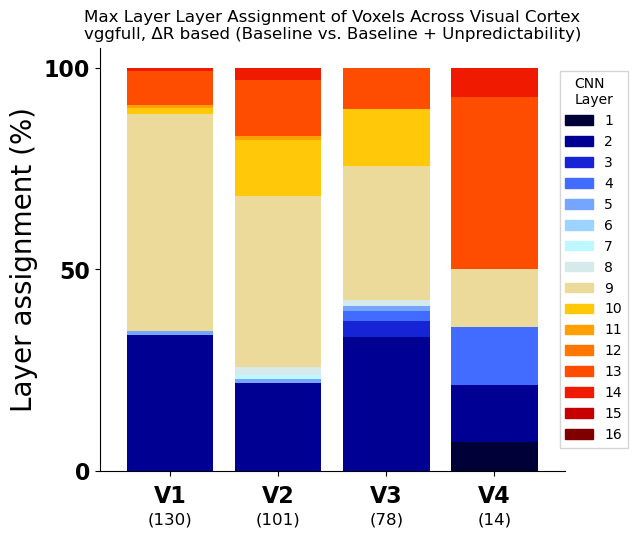

Working on subj07
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     57  25  52  V1   0.837129   0.839622   0.771757   0.726900   0.798940   
1     58  25  53  V1   0.972050   1.000000   0.911504   0.854040   0.845414   
2     58  26  53  V1   0.955302   0.978494   0.912640   0.846567   0.863018   
3     58  26  54  V1   0.950169   0.979031   0.892112   0.799496   0.812813   
4     58  27  53  V1   0.738868   0.766850   0.710080   0.639331   0.684997   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
102   88  24  51  V4   0.908935   0.949897   0.775175   0.683610   0.768114   
103   93  23  52  V4   0.082357   0.000000   0.063636   0.107616   0.095572   
104   94  24  52  V4   0.119448   0.000000   0.053679   0.088714   0.078903   
105   94  24  53  V4   0.608010   0.601832   0.589038   0.599697   0.650208   
106  104  22  50  V4   0.025221   0.000000   0.062442   0.071058   0.156717   

     delta_r_7  ...  delta_r_10  

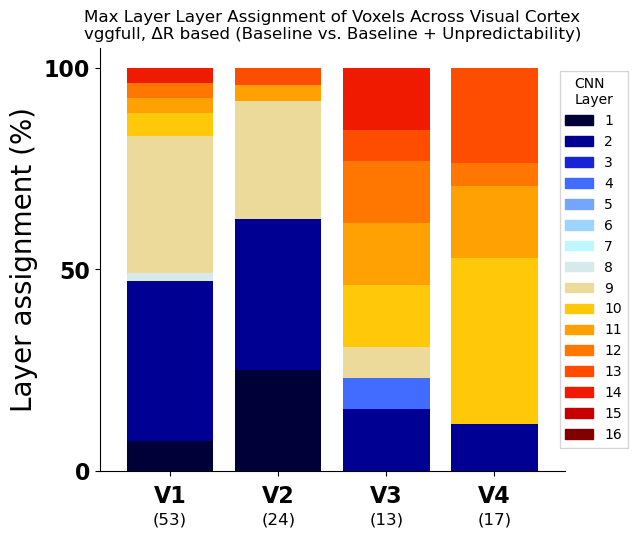

Working on subj07
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     63  19  57  V1   1.000000   0.884443   0.941742   0.976481   0.961917   
1     64  21  56  V1   0.000000   0.111814   0.319082   0.215668   0.290210   
2     68  23  58  V1   0.968489   1.000000   0.879568   0.836409   0.747256   
3     70  16  62  V1   0.502110   0.712031   0.417932   0.366207   0.273127   
4     70  16  63  V1   0.897250   1.000000   0.850859   0.828381   0.716860   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
358   97  25  49  V4   0.103259   0.182741   0.045631   0.000000   0.080787   
359   98  32  48  V4   0.470853   0.614794   0.492290   0.430382   0.443892   
360   99  31  48  V4   0.383839   0.391661   0.423182   0.395323   0.474013   
361  100  26  47  V4   0.673918   0.698837   0.613796   0.576688   0.562065   
362  100  27  47  V4   0.133029   0.135549   0.052892   0.000000   0.035881   

     delta_r_7  ...  delta_r_10  

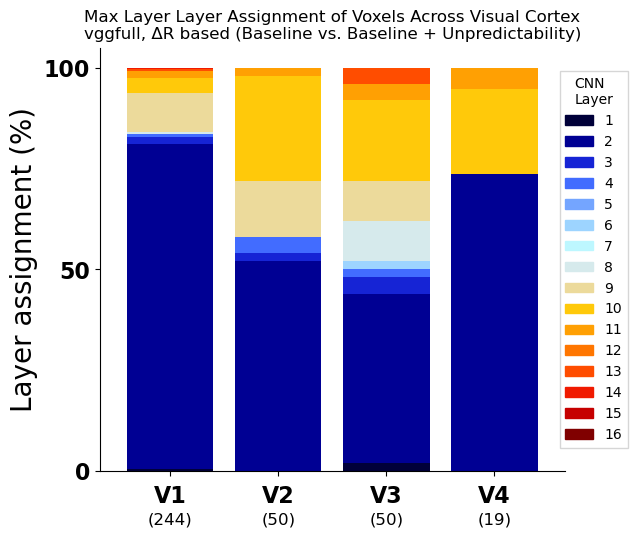

Working on subj07
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     48   8  72  V1   0.943302   1.000000   0.940506   0.910022   0.841055   
1     48   9  71  V1   0.935127   1.000000   0.899882   0.848922   0.807448   
2     49   7  73  V1   0.938610   1.000000   0.957700   0.933437   0.861052   
3     49   8  72  V1   0.942491   1.000000   0.947994   0.918700   0.865513   
4     49   8  73  V1   0.950227   1.000000   0.959711   0.928650   0.880050   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
394   47  29  58  V4   0.245945   0.296082   0.243889   0.203024   0.215419   
395   91  21  49  V4   0.975928   1.000000   0.896880   0.871040   0.824180   
396   96  25  54  V4   0.228079   0.185239   0.050060   0.000000   0.055868   
397   98  21  47  V4   0.270272   0.285713   0.275246   0.254867   0.305782   
398  100  22  52  V4   0.239825   0.078230   0.017391   0.000000   0.047730   

     delta_r_7  ...  delta_r_10  

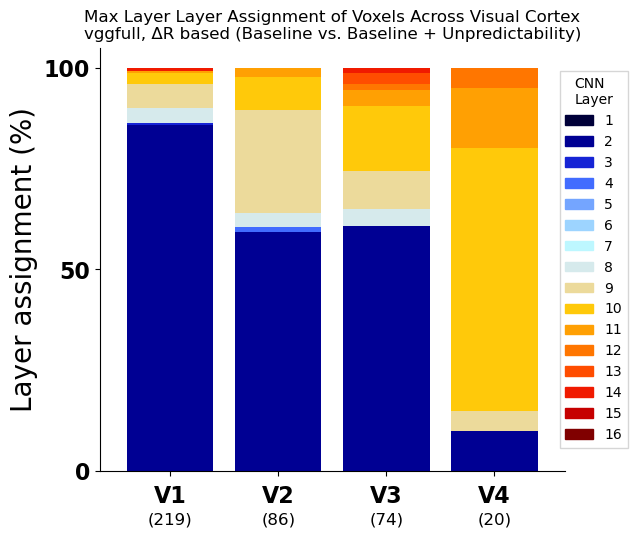

Working on subj08
      x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0    65  16  45  V1   0.968069   1.000000   0.959536   0.904608   0.927106   
1    65  17  54  V1   0.805876   0.860613   0.818279   0.737922   0.813396   
2    65  18  46  V1   0.884412   0.934163   0.899460   0.844977   0.957137   
3    65  18  53  V1   0.843536   0.866776   0.845722   0.787720   0.849370   
4    65  18  54  V1   0.670327   0.717217   0.700605   0.616527   0.687611   
..   ..  ..  ..  ..        ...        ...        ...        ...        ...   
250  92  26  43  V4   0.076518   0.000000   0.110754   0.097046   0.287418   
251  92  28  42  V4   0.087031   0.000000   0.173579   0.171271   0.390142   
252  92  28  43  V4   0.117497   0.000000   0.183797   0.171399   0.390515   
253  92  29  43  V4   0.721814   0.700383   0.823168   0.810511   0.889480   
254  94  28  41  V4   0.845996   1.000000   0.959886   0.999999   0.683974   

     delta_r_7  ...  delta_r_10  delta_r_11  

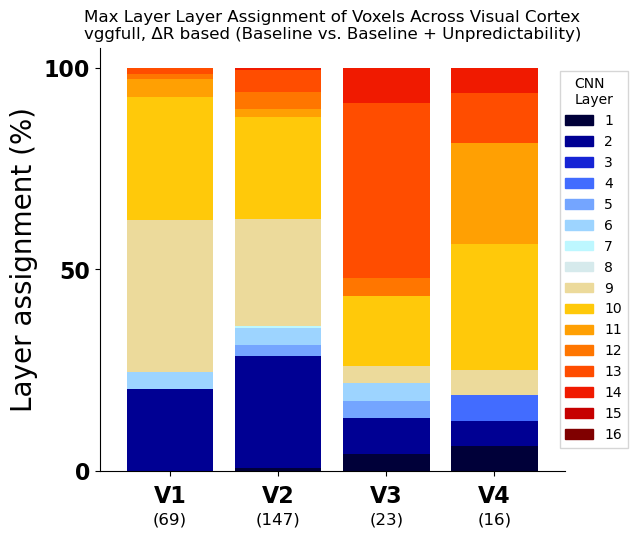

Working on subj08
       x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0     52  12  55  V1   0.909807   0.951379   0.978297   1.000000   0.919512   
1     60  20  43  V1   0.460683   0.392413   0.359860   0.376149   0.558796   
2     75  10  64  V1   0.954614   1.000000   0.950538   0.905994   0.877197   
3     75  10  65  V1   0.937178   1.000000   0.912514   0.852363   0.805162   
4     76   9  64  V1   0.952905   1.000000   0.956900   0.913471   0.895820   
..   ...  ..  ..  ..        ...        ...        ...        ...        ...   
626   98  21  40  V4   0.133434   0.167462   0.071981   0.008561   0.114771   
627   99  21  41  V4   0.788020   1.000000   0.683274   0.660463   0.447013   
628  100  19  42  V4   0.765057   1.000000   0.796580   0.798518   0.453153   
629  100  21  41  V4   0.857780   1.000000   0.926371   0.925540   0.774782   
630  100  21  43  V4   0.128531   0.159945   0.070463   0.069361   0.064868   

     delta_r_7  ...  delta_r_10  

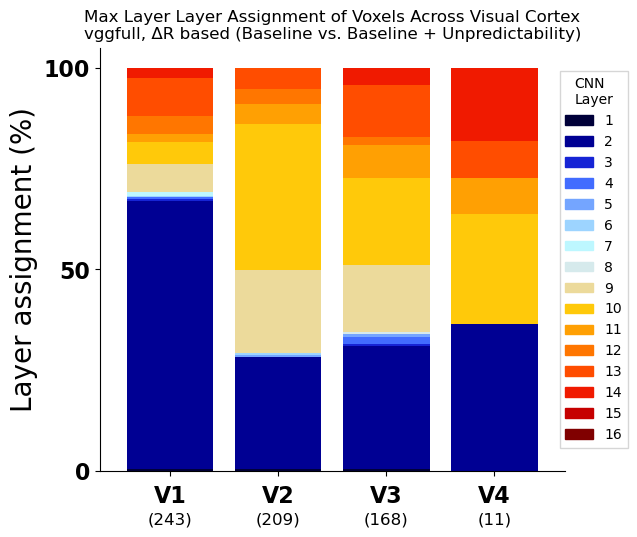

Working on subj08
      x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0    48  20  45  V1   0.822555   0.989739   0.689473   0.582963   0.578069   
1    49  18  50  V1   0.848384   1.000000   0.768730   0.681944   0.636662   
2    49  18  51  V1   0.451484   0.550892   0.439079   0.357407   0.399121   
3    49  19  48  V1   0.038247   0.067778   0.071954   0.040885   0.000000   
4    49  19  49  V1   0.797400   1.000000   0.695255   0.626548   0.543867   
..   ..  ..  ..  ..        ...        ...        ...        ...        ...   
658  41  29  38  V4   0.941419   1.000000   0.846206   0.772127   0.731668   
659  44  38  40  V4   0.311924   0.378859   0.228667   0.145070   0.255403   
660  46  35  42  V4   0.397265   0.391496   0.273106   0.192885   0.357735   
661  46  39  38  V4   0.158116   0.073771   0.095635   0.019557   0.154591   
662  51  38  42  V4   0.892472   0.952898   0.882512   0.835171   0.857573   

     delta_r_7  ...  delta_r_10  delta_r_11  

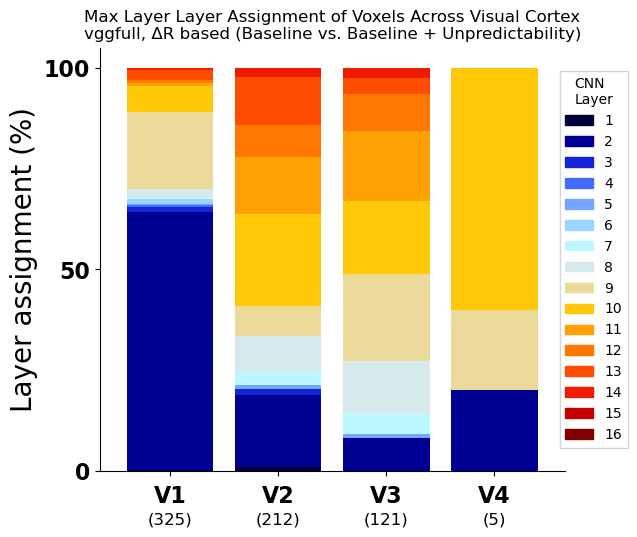

In [4]:
#### FIX THIS SHIT!!!!!!!!! MAKE SURE THAT IT CAN FIND IT, PATH IS THIS:
# /home/rfpred/data/custom_files/subj02/results/unpred/vggfull/peri_ecc2.0_angle90_gabor_allfilts

## PERHAPS INCLUDE SOME SORT OF PERI_SUFFIX ARGUMENT AND ALSO MAKE SURE THAT THE SAVING OF THE .NII FILE IS DONE PROPERLY

    # vgg16results = rd(subject=subject, 
    #                   folder=f"unpred/vggfull/peri_ecc2.0_angle{angle}_gabor_allfilts", 
    #                   model="vggfull", 
    #                   statistic="delta_r", 
    #                   verbose=False, 
    #                   skip_norm_lay = True) # Norm layer is not in the encoding featmaps (i think)

for subject in NSP.subjects:
    
    for angle in [90, 210, 330]:
        print(f"Working on {subject}")
        # subject = "subj05"
        reg_to_nifti(subject=subject,
                    reg_type="unpred",
                    model="vggfull",
                    assign_stat="max",
                    reg_stat="delta_r",
                    plot_brain=False,
                    plot_lay_assign=True,
                    save_nifti=True,
                    verbose=True,
                    mean_delta_r=False,
                    peripheral=True,
                    peri_ecc=2.0,
                    peri_angle=angle,
                    mean_unpred=False,
                    # custom_subfolder="vggfull/peri_ecc2.0_angle90_gabor_allfilts",
                    peri_suffix="_gabor_allfilts",
                    )

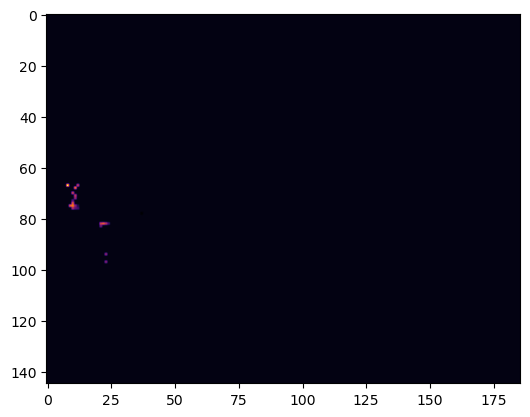

In [29]:
import nibabel as nib
import matplotlib.pyplot as plt
brain = nib.load("/home/rfpred/data/custom_files/subj01/stat_volumes/unpred_peri_ecc2.0_angle90_gabor_allfilts_vggfull_delta_r.nii").get_fdata()


plt.imshow(brain[:,:,65], cmap="inferno")


In [10]:
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="unpred_peri_ecc2.0_angle330_mean_unpred_vggfull_beta_unpred",
                interpmethod="cubic",
                )

### Peripheral results tryout

In [6]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vggfull",
                assign_stat="max",
                reg_stat="R",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True,
                mean_delta_r=False,
                # peripheral=True,
                # peri_ecc=2.0,
                # peri_angle=90
                )

Working on subj01
        x   y   z roi       R_2       R_3       R_4       R_5       R_6  \
0      56   8  75  V1  0.071258  0.075079  0.073251  0.072781  0.070970   
1      56   9  74  V1  0.037536  0.040949  0.040035  0.040002  0.038152   
2      56   9  76  V1  0.050872  0.053501  0.052431  0.052108  0.051515   
3      56  10  75  V1  0.039483  0.041818  0.040966  0.040790  0.039803   
4      56  10  76  V1  0.040446  0.042842  0.041389  0.041171  0.040102   
...   ...  ..  ..  ..       ...       ...       ...       ...       ...   
2521  113  26  69  V4  0.136464  0.136463  0.135771  0.134846  0.135099   
2522  113  28  61  V4  0.007003  0.006513  0.006104  0.005729  0.006373   
2523  114  25  69  V4  0.115529  0.116371  0.114761  0.113676  0.113560   
2524  114  26  67  V4  0.150638  0.149114  0.147882  0.146709  0.148815   
2525  114  27  64  V4  0.011993  0.011615  0.011589  0.011548  0.011756   

           R_7       R_8       R_9      R_10      R_11      R_12      R_13  \
0  

In [31]:
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        for angle in [90, 210, 330]:
            vol_to_surf(subject=subject,
                    # source_file_name="unpred_peri_ecc2.0_angle330_mean_unpred_vggfull_beta_unpred",
                    source_file_name=f"unpred_peri_ecc2.0_angle{angle}_gabor_allfilts_vggfull_delta_r",
                    interpmethod="cubic",
                    )

### Baseline model performance work

In [3]:


for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vggfull",
                assign_stat="max",
                reg_stat="R",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True,
                mean_delta_r=False)

Working on subj01
        x   y   z roi       R_2       R_3       R_4       R_5       R_6  \
0      56   8  75  V1  0.071258  0.075079  0.073251  0.072781  0.070970   
1      56   9  74  V1  0.037536  0.040949  0.040035  0.040002  0.038152   
2      56   9  76  V1  0.050872  0.053501  0.052431  0.052108  0.051515   
3      56  10  75  V1  0.039483  0.041818  0.040966  0.040790  0.039803   
4      56  10  76  V1  0.040446  0.042842  0.041389  0.041171  0.040102   
...   ...  ..  ..  ..       ...       ...       ...       ...       ...   
2521  113  26  69  V4  0.136464  0.136463  0.135771  0.134846  0.135099   
2522  113  28  61  V4  0.007003  0.006513  0.006104  0.005729  0.006373   
2523  114  25  69  V4  0.115529  0.116371  0.114761  0.113676  0.113560   
2524  114  26  67  V4  0.150638  0.149114  0.147882  0.146709  0.148815   
2525  114  27  64  V4  0.011993  0.011615  0.011589  0.011548  0.011756   

           R_7       R_8       R_9      R_10      R_11      R_12      R_13  \
0  

In [4]:
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="unpred_vggfull_R",
                interpmethod="cubic",
                )

### Make nifti files based on specific regression results

In [9]:
# for subject in NSP.subjects:
#     print(f"Working on {subject}")
#     # subject = "subj05"
#     reg_to_nifti(subject=subject,
#                 reg_type="unpred",
#                 model="vggfull",
#                 assign_stat="max",
#                 reg_stat="delta_r",
#                 plot_brain=False,
#                 plot_lay_assign=False,
#                 save_nifti=True,
#                 verbose=True,
#                 mean_delta_r=True)

for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vggfull",
                assign_stat="max",
                reg_stat="beta_unpred",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True,
                mean_delta_r=True)

Working on subj01
        x   y   z roi  beta_unpred_2  beta_unpred_3  beta_unpred_4  \
0      56   8  75  V1       0.025816       0.027257       0.026944   
1      56   9  74  V1       0.019701       0.021052       0.020905   
2      56   9  76  V1       0.022882       0.023993       0.023863   
3      56  10  75  V1       0.019363       0.020361       0.020244   
4      56  10  76  V1       0.018772       0.019809       0.019527   
...   ...  ..  ..  ..            ...            ...            ...   
2521  113  26  69  V4       0.081230       0.080533       0.080477   
2522  113  28  61  V4       0.015642       0.015608       0.015480   
2523  114  25  69  V4       0.109543       0.109398       0.107979   
2524  114  26  67  V4       0.152391       0.148429       0.147189   
2525  114  27  64  V4       0.006012       0.004380       0.005383   

      beta_unpred_5  beta_unpred_6  beta_unpred_7  beta_unpred_8  \
0          0.026777       0.025891       0.026675       0.027938   
1    

In [10]:
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="unpred_vggfull_beta_unpred",
                interpmethod="cubic",
                )

In [3]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="encoding",
                model="VGG",
                assign_stat="max",
                reg_stat="delta_r",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True)

Working on subj01


         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       55   7  77  V1   0.000000   0.389488   0.592121   0.702513   
1       55  11  75  V1   0.226572   0.556553   0.967471   0.690021   
2       56   7  76  V1   0.000000   0.112139   0.502825   0.502724   
3       56   7  77  V1   0.444122   0.768348   0.785165   0.478667   
4       56   7  78  V1   1.000000   0.986705   0.414089   0.329508   
...    ...  ..  ..  ..        ...        ...        ...        ...   
27176  114  28  65  V4   0.163353   0.000000   0.613225   0.529675   
27177  114  28  66  V4   0.000000   0.041205   0.370714   0.501538   
27178  114  29  62  V4   0.000000   0.373132   0.599396   0.388931   
27179  115  28  64  V4   0.000000   0.177272   0.510690   0.707401   
27180  115  28  65  V4   0.116544   0.314804   0.398240   0.000000   

       delta_r_11  delta_r_13  delta_r_15  delta_r_18  delta_r_20  delta_r_22  \
0        0.795054    0.371885    0.035587    0.668762    0.413156    0.655852 

In [4]:
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="encoding_VGG_layassign_max",
                interpmethod="wta",
                )

In [7]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
# subject = "subj01"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vgg-b",
                reg_stat="delta_beta",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True)

Working on subj01
        x   y   z roi  delta_beta_1  delta_beta_2  delta_beta_3  delta_beta_4  \
0      56   8  75  V1     -0.000001      0.002241      0.001205     -0.000262   
1      56   9  74  V1     -0.000077      0.001635      0.000536     -0.000865   
2      56   9  76  V1      0.000037      0.001953      0.001057     -0.000288   
3      56  10  75  V1      0.000259      0.001830      0.000978     -0.000371   
4      56  10  76  V1     -0.000125      0.001487      0.000644     -0.000654   
...   ...  ..  ..  ..           ...           ...           ...           ...   
2521  113  26  69  V4      0.002329      0.006052      0.007095      0.007935   
2522  113  28  61  V4      0.000341      0.000796      0.001194      0.002224   
2523  114  25  69  V4      0.003936      0.009536      0.011083      0.012477   
2524  114  26  67  V4      0.008692      0.013876      0.018739      0.022968   
2525  114  27  64  V4      0.001256      0.000399      0.002080      0.003588   

      del

In [ ]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vgg-b",
                assign_stat="max",
                reg_stat="delta_r",
                plot_brain=False,
                plot_lay_assign=True,
                save_nifti=True,
                mean_delta_r=True)

### Turn volume space brains into surface space brains

In [8]:
# For a single sub
for subject in NSP.subjects:

    vol_to_surf(subject=subject,
                source_file_name="unpred_vgg-b_delta_beta")

In [ ]:
# For a single sub
vol_to_surf(subject="subj02",
            source_file_name="unpred_vgg-b_layassign_max")

In [ ]:
for subject in NSP.subjects:
    vol_to_surf(subject=subject,
                source_file_name="unpred_vgg-b_mean_delta_r",
                interpmethod="nearest")

# Voxel masks for all subs

In [3]:
# /home/rfpred/data/natural-scenes-dataset/nsddata/ppdata/subj01/func1mm/roi/prf-visualrois.nii.gz

for subject in NSP.subjects:
    filepath = f"/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata/{subject}/func1mm/roi/prf-visualrois.nii.gz"
    vol_to_surf(subject=subject,
                source_file_name="",
                interpmethod="wta",
                custom_path=filepath
                )

In [5]:
subject = "subj01"

rois, roi_masks, viscortex_mask = NSP.cortex.visrois_dict(verbose=False)
prf_dict = NSP.cortex.prf_dict(rois, roi_masks)

max_size = 2
min_size = .15
patchbound = 1
min_nsd_R2 = 0
min_prf_R2 = 0

voxeldict = {}
n_voxels = []
for roi in rois:
    print_attr = True if roi == rois[len(rois)-1] else False
    voxeldict[roi] = VoxelSieve(NSP, prf_dict, roi_masks,
                                subject=subject, 
                                roi=roi,
                                patchloc='central', 
                                max_size=max_size, 
                                min_size=min_size, 
                                patchbound=patchbound, 
                                min_nsd_R2=min_nsd_R2, 
                                min_prf_R2=min_prf_R2,
                                print_attributes=print_attr,
                                fixed_n_voxels=None)
    n_voxels.append(len(voxeldict[roi].size))
    
# max_n_voxels = np.min(n_voxels)




V1 voxels that fulfill requirements: 437 out of 7887.
V2 voxels that fulfill requirements: 805 out of 8296.
V3 voxels that fulfill requirements: 746 out of 7022.
V4 voxels that fulfill requirements: 538 out of 3976.

Class contains the following attributes:
 .angle
 .ecc
 .figdims
 .nsd_R2
 .patchbound
 .patchcoords
 .patchmask
 .prf_R2
 .sigmas
 .size
 .vox_lim
 .vox_pick
 .xcoor
 .xyz
 .ycoor




In [21]:
import numpy as np

        
        

(437, 3)
(1242, 3)
(1988, 3)
(2526, 3)


In [39]:

max_size = 2
min_size = .15
patchbound = 1
min_nsd_R2 = 0
min_prf_R2 = 0



for subject in NSP.subjects:
    voxeldict = {}
    n_voxels = []
    for roi in rois:
        print_attr = True if roi == rois[len(rois)-1] else False
        voxeldict[roi] = VoxelSieve(NSP, prf_dict, roi_masks,
                                    subject=subject, 
                                    roi=roi,
                                    patchloc='central', 
                                    max_size=max_size, 
                                    min_size=min_size, 
                                    patchbound=patchbound, 
                                    min_nsd_R2=min_nsd_R2, 
                                    min_prf_R2=min_prf_R2,
                                    print_attributes=print_attr,
                                    fixed_n_voxels=None)
        n_voxels.append(len(voxeldict[roi].size))
        
        
    
    
    for i in range(1, 5):
        
        if i == 1:
            voxxyz = voxeldict[f"V{i}"].xyz
        else:
            voxxyz = np.concatenate((voxxyz, voxeldict[f"V{i}"].xyz), axis=0)
            
        print(voxxyz.shape)
            
    
    _ = NSP.utils.coords2nifti(subject=subject,
                        prf_dict=prf_dict,
                        coords=voxxyz,
                        keep_vals=False,
                        save_nifti=True,
                        file_name="voxelselection")

    vol_to_surf(subject=subject,
            source_file_name="voxelselection",
            interpmethod="wta",
            )


V1 voxels that fulfill requirements: 437 out of 7887.
V2 voxels that fulfill requirements: 805 out of 8296.
V3 voxels that fulfill requirements: 746 out of 7022.
V4 voxels that fulfill requirements: 538 out of 3976.

Class contains the following attributes:
 .angle
 .ecc
 .figdims
 .nsd_R2
 .patchbound
 .patchcoords
 .patchmask
 .prf_R2
 .sigmas
 .size
 .vox_lim
 .vox_pick
 .xcoor
 .xyz
 .ycoor


(437, 3)
(1242, 3)
(1988, 3)
(2526, 3)
V1 voxels that fulfill requirements: 176 out of 6476.
V2 voxels that fulfill requirements: 400 out of 6376.
V3 voxels that fulfill requirements: 693 out of 6236.
V4 voxels that fulfill requirements: 299 out of 2887.

Class contains the following attributes:
 .angle
 .ecc
 .figdims
 .nsd_R2
 .patchbound
 .patchcoords
 .patchmask
 .prf_R2
 .sigmas
 .size
 .vox_lim
 .vox_pick
 .xcoor
 .xyz
 .ycoor


(176, 3)
(576, 3)
(1269, 3)
(1568, 3)
V1 voxels that fulfill requirements: 198 out of 7358.
V2 voxels that fulfill requirements: 552 out of 6721.
V3 voxels that 

In [37]:
# for subject in NSP.subjects:

filepath = f"/home/rfpred/data/custom_files/{subject}/stat_volumes/"#voxelselection.nii"
vol_to_surf(subject=subject,
            source_file_name="voxelselection",
            interpmethod="wta",
            # custom_path=filepath
            )